In [1]:
"""
В numpy есть модуль, предназначенный для работы с различными структурами линейной алгебры. Этот модуль называется numpy.linalg
В частности, в этом модуле можно найти функцию для подсчета нормы некоторого вектора, проще говоря - его длины с точки зрения некоторой метрики
Эта функция называется numpy.linalg.norm
https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
"""

import numpy as np
from numpy.linalg import norm

In [3]:
"""
В базовом случае np.linalg.norm вычисляет наиболее знакомую и понятную для нас 2-норму, которая отвечает евклидовой метрике
"""
vec = np.array([1,2,3])
np.linalg.norm(vec)

3.7416573867739413

In [4]:
def dist(a: np.array, b: np.array) -> float:
    d = a - b
    r = np.linalg.norm(d)
    return r
dist(np.array([1, 0]), np.array([0, 1]))

1.4142135623730951

In [5]:
def dist(a: np.array ,b: np.array, p: int) -> float:
  d = a - b
  r = np.linalg.norm(d, ord=p)
  return r
dist(np.array([1, 0]), np.array([0, 1]), 1)

2.0

In [8]:
def cosine(a: np.array, b: np.array):
    dot = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    cos = dot / norm_a / norm_b
    return cos


def cosine_dist(a: np.array, b: np.array):
    cos = cosine(a, b)
    dist = 1 - cos
    return dist

cosine_dist(np.array([1,0]), np.array([0,1]))

1.0

In [9]:
#Но то же можно сделать намного проще, воспользовавшись функцией из модуля scipy.
from scipy.spatial.distance import cosine as c
c(np.array([1,0]), np.array([0,1]))


1.0

#Реализация KNN
Напишем функцию KNN, которая вернет нам предсказание, согласно алгоритму k ближайших соседей и набор k ближайших точек, по которым было сделано предсказание
Предположения:

- Работаем на двумерной плоскости

- Решаем задачу бинарной классификации

- k подбираем руками

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

In [31]:
def draw(KNN):
    """
    Декоратор, позволяющий отрисовывать результат, полученный в результате работы функции KNN
    """
    def wrapper(point: list, class1: np.array, class2: np.array, N: int, normfunc):
        print(KNN.__name__, "running")
        plt.figure(figsize=(15, 15))
        
        """
        задаем размеры классов
        """
        num_1 = class1.shape[0]
        num_2 = class2.shape[0]
        num = num_1 + num_2

        """
        Задаем координаты точек из каждого класса X и Y
        """
        X1 = class1[:, 0]
        Y1 = class1[:, 1]
        X2 = class2[:, 0]
        Y2 = class2[:, 1]
        X = np.concatenate([X1, X2])
        Y = np.concatenate([Y1, Y2])
        class_flag = [0 for i in range(num_1)] + [1 for i in range(num_2)]
        """
        Записываем все в dataframe, чтобы воспользоваться методами seaborn
        """
        data = pd.DataFrame({"Class": class_flag, "X": X, "Y": Y})
        plt.grid()
        plt.scatter(x=point[0], y=point[1], c="r")
        sns.scatterplot(data=data, x="X", y="Y", hue="Class")
        """
        Пользуемся функцией, которую пишем самостоятельно, чтобы получить выход алгоритма
        """
        result, sorted_points = KNN(point, class1, class2, N, normfunc)
        print(f"RESULT: point was  assigned to class {result}")
        
        for i in range(N):
            plt.plot(
                [sorted_points[i][0], point[0]],
                [sorted_points[i][1], point[1]],
                c="r" if sorted_points[i][2] == 0 else "b",
            )

    return wrapper

In [32]:
@draw
def KNN(point: list, class1: np.array, class2: np.array, K: int, normfunc: callable):
    
    #задаем размеры классов
    num_1 = class1.shape[0]
    num_2 = class2.shape[0]
    num = num_1 + num_2


    # Задаем координаты точек из каждого класса X и Y
    
    X1 = class1[:, 0]
    Y1 = class1[:, 1]
    X2 = class2[:, 0]
    Y2 = class2[:, 1]
    X = np.concatenate([X1, X2]).reshape(-1, 1)
    Y = np.concatenate([Y1, Y2]).reshape(-1, 1)
    
        
    # Проводим сортировку всех точек, добавив к ним значение класса, к которому они принадлежат,
    # На основе заданной функции расстояния normfunc = normfunc(x1, y1, x2, y2)
        
    class_flag = np.array(
        [0 for i in range(num_1)] + [1 for i in range(num_2)]
    ).reshape(-1, 1)
    keyfunc = lambda P: normfunc(P[0], P[1], point[0], point[1])
    points = np.concatenate((X, Y, class_flag), axis=1).tolist()

    sorted_points = sorted(points, key=keyfunc)


    #Считаем в цикле число точек, попавших в класс 0 и попавших в класс 1, из top-N
    C0 = 0
    C1 = 0
    for p in sorted_points[:K]:
        assert p[2] == 1 or p[2] == 0
        if p[2] == 0:
            C0 += 1
        else:
            C1 += 1
    result = 0 if C0 > C1 else 1
    print(f"There are {C0} points of class 0 in the set of {K} nearest points")
    print(f"There are {C1} points of class 1 in the set of {K} nearest points")
    return result, sorted_points[:K]



KNN running
There are 29 points of class 0 in the set of 30 nearest points
There are 1 points of class 1 in the set of 30 nearest points
RESULT: point was  assigned to class 0


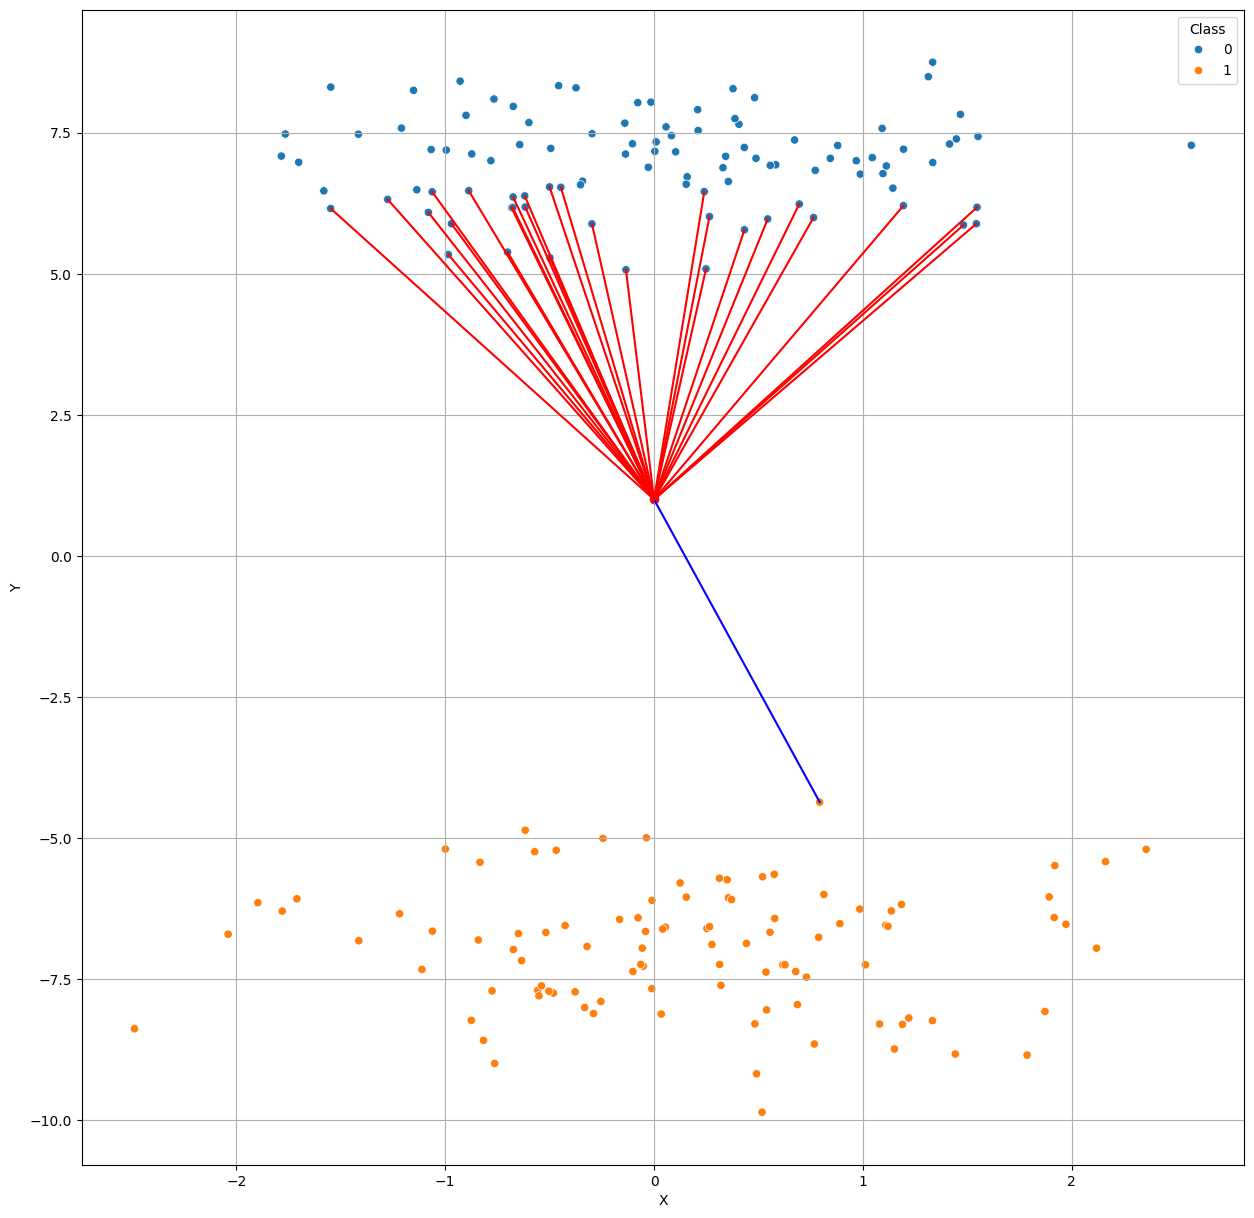

In [33]:
def euc_distance(point_1_x, point_1_y, point_2_x, point_2_y):
    x_diff = point_1_x - point_2_x
    y_diff = point_1_y - point_2_y
    return np.sqrt(x_diff**2 + y_diff**2)


point = [0, 1]
class_1 = np.random.randn(100, 2) + np.array([0.0, 7.0])
class_2 = np.random.randn(100, 2) + np.array([0.0, -7.0])
K = 30
KNN(point, class_1, class_2, K, euc_distance)

KNN running
There are 15 points of class 0 in the set of 30 nearest points
There are 15 points of class 1 in the set of 30 nearest points
RESULT: point was  assigned to class 1


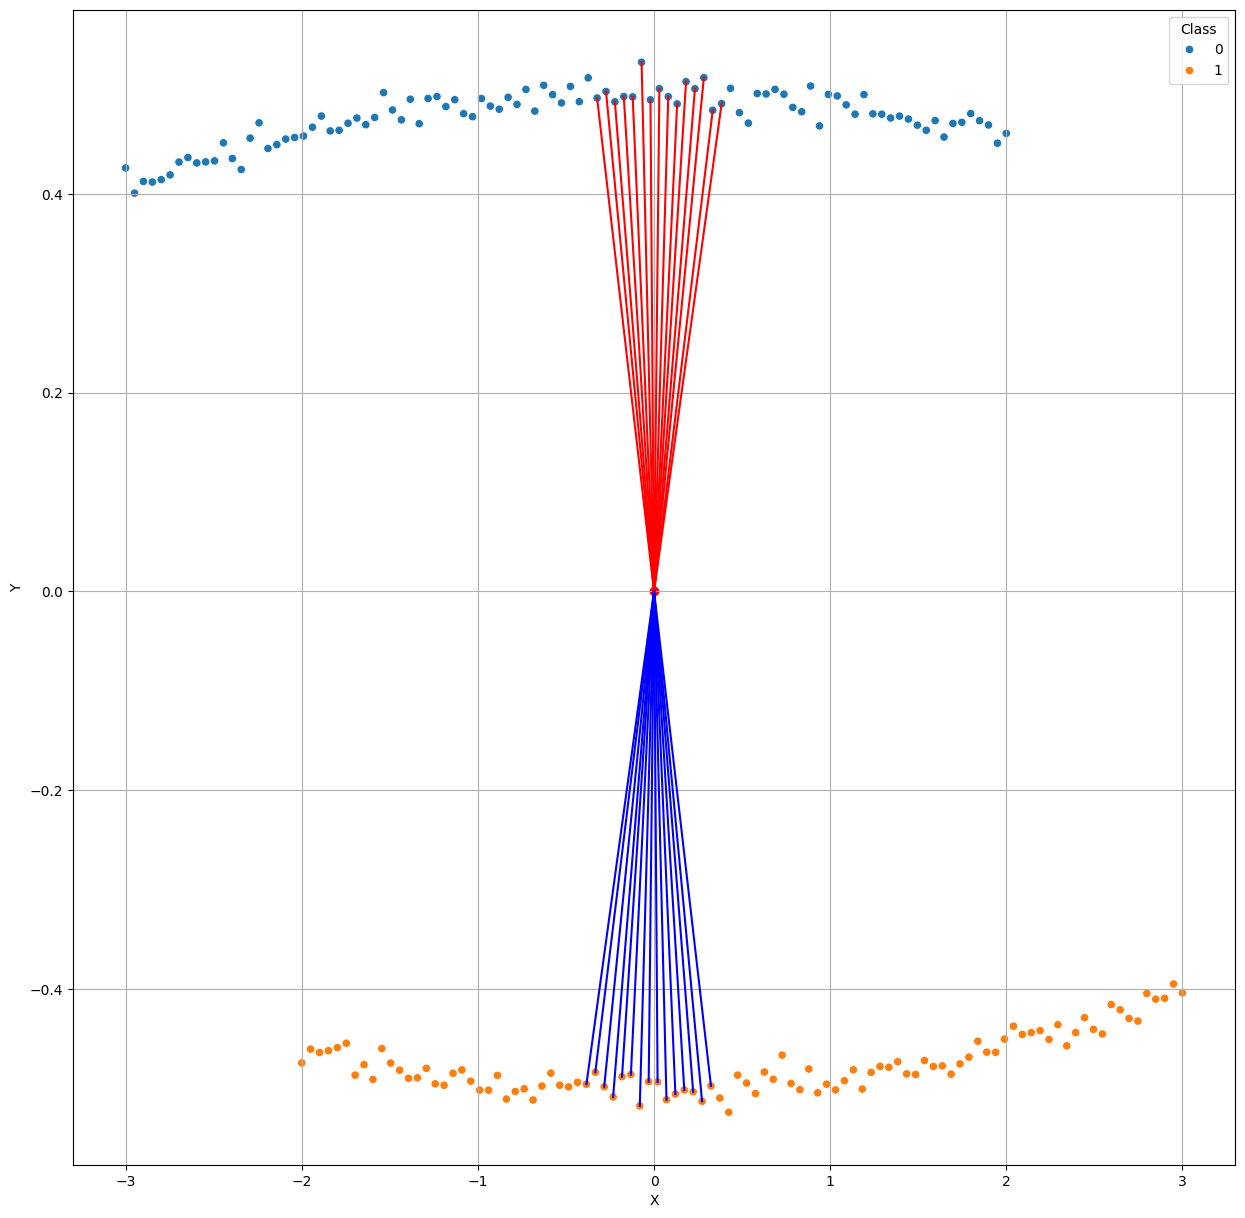

In [37]:
point = [0, 0]
class_1 = np.stack(
    [[x, np.sqrt(25 - x**2) / 10 + np.random.randn() / 100]
    for x in np.linspace(-3, 2, 100)]
)
class_2 = np.stack(
    [[x, -np.sqrt(25 - x**2) / 10 + np.random.randn() / 100]
    for x in np.linspace(-2, 3, 100)]
)
K = 30
KNN(point, class_1, class_2, K, euc_distance)

KNN running
There are 5 points of class 0 in the set of 30 nearest points
There are 25 points of class 1 in the set of 30 nearest points
RESULT: point was  assigned to class 1


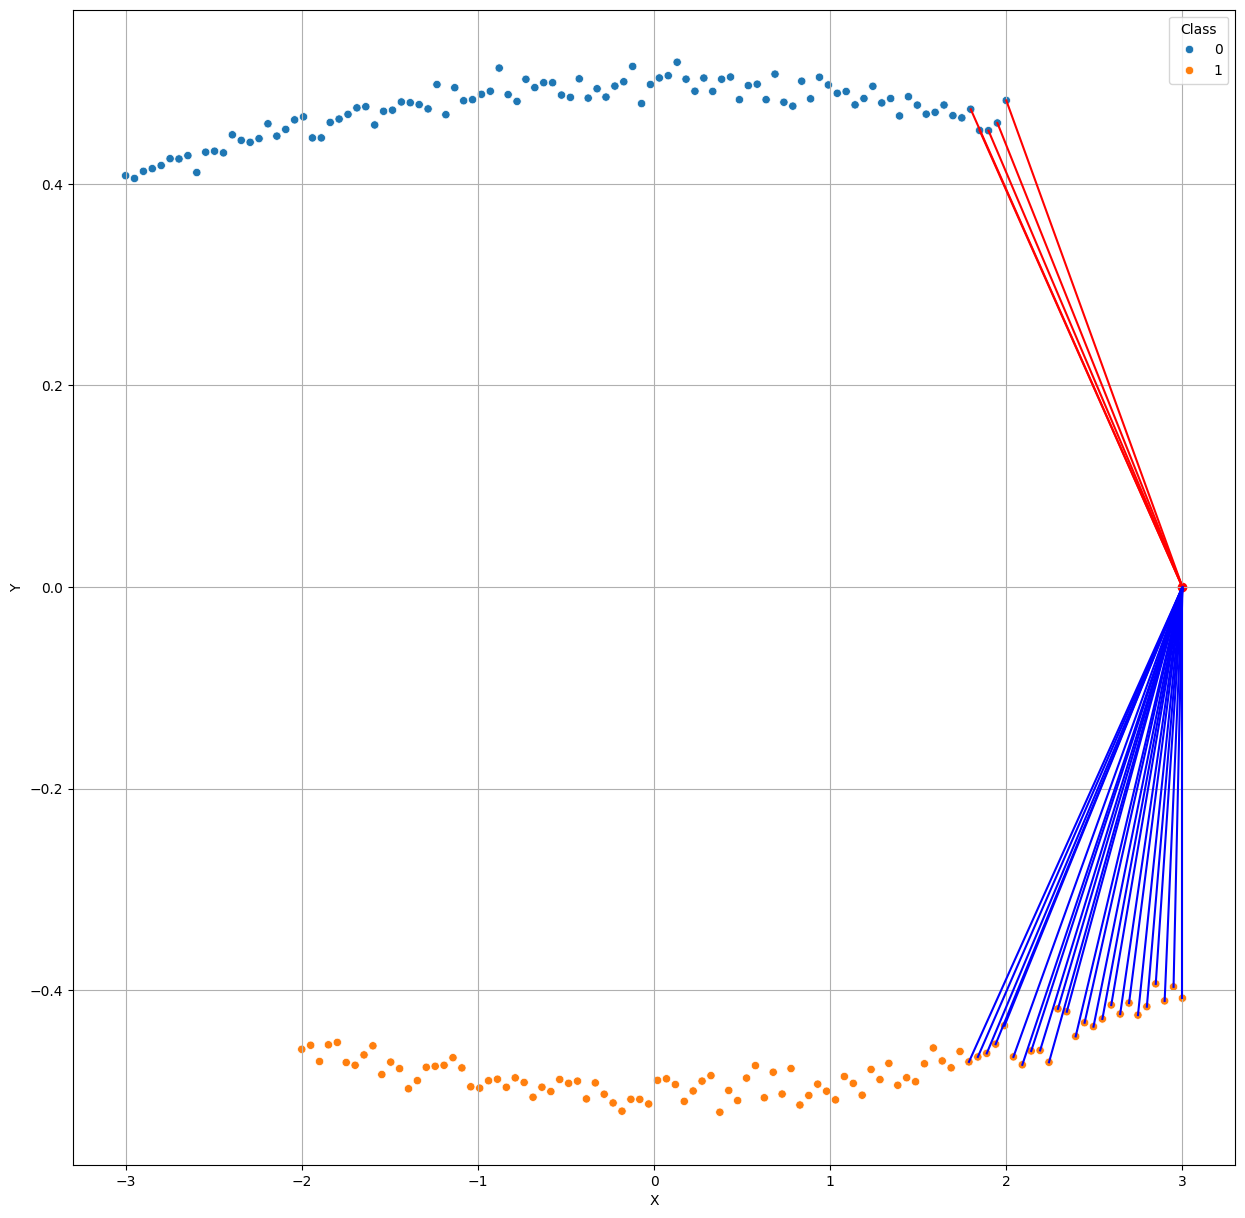

In [39]:
point = [3, 0]
class_1 = np.stack(
    [[x, np.sqrt(25 - x**2) / 10 + np.random.randn() / 100]
    for x in np.linspace(-3, 2, 100)]
)
class_2 = np.stack(
    [[x, -np.sqrt(25 - x**2) / 10 + np.random.randn() / 100]
    for x in np.linspace(-2, 3, 100)]
)
K = 30
KNN(point, class_1, class_2, K, euc_distance)

KNN running
There are 64 points of class 0 in the set of 100 nearest points
There are 36 points of class 1 in the set of 100 nearest points
RESULT: point was  assigned to class 0


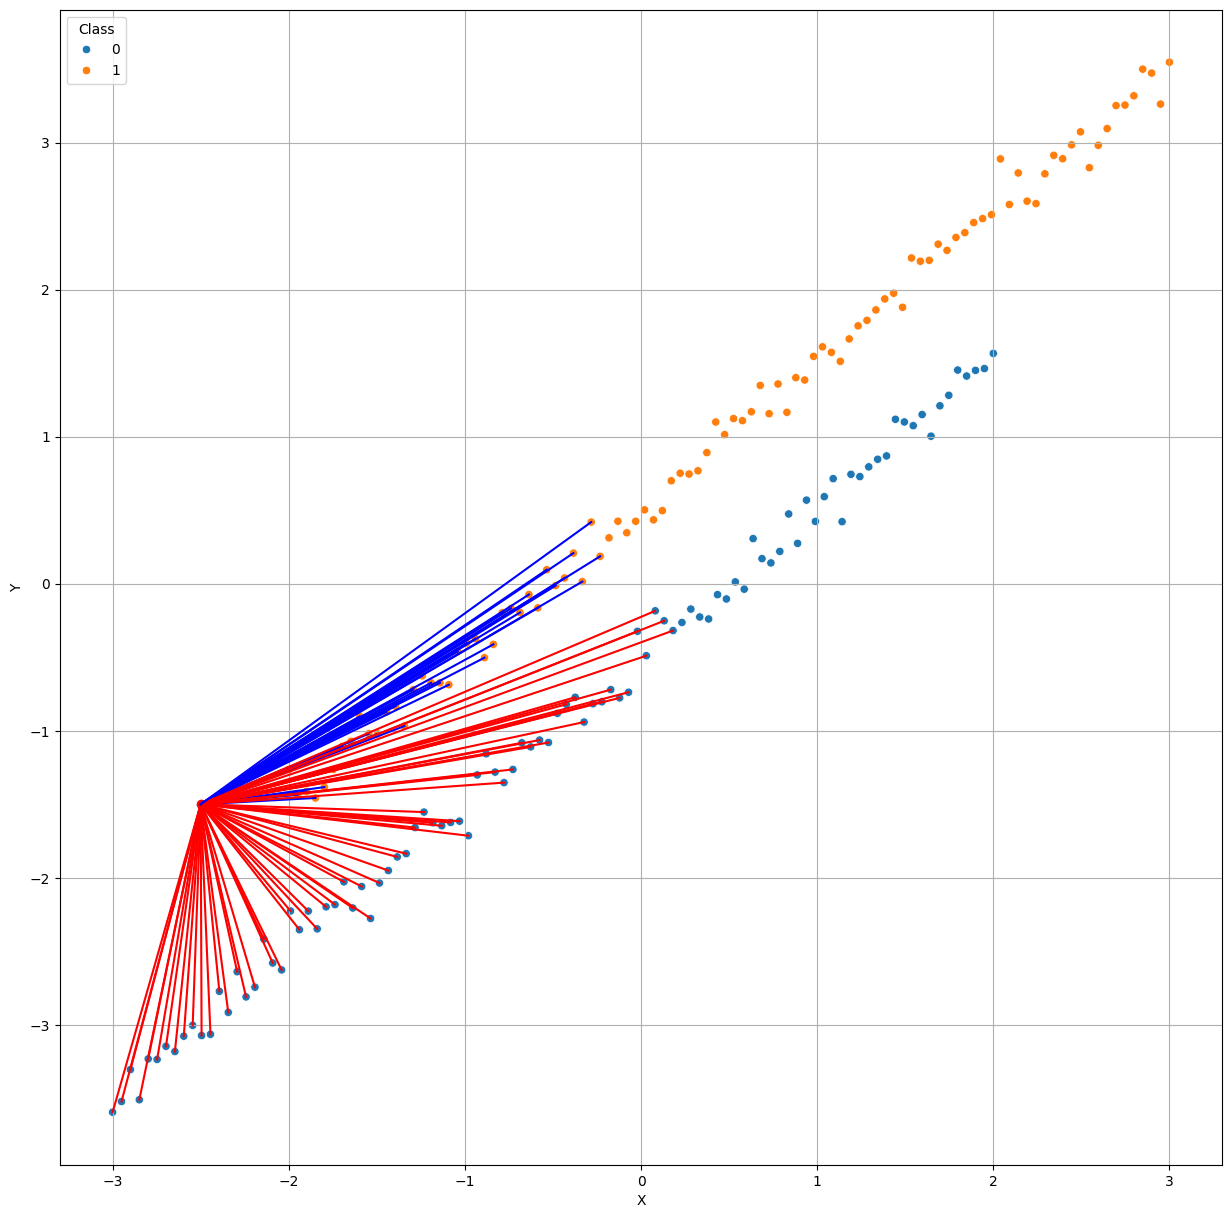

In [42]:
#плохой k
point = [-2.5, -1.5]
class_1 = np.stack(
    [[x, x - 0.5 + np.random.randn() / 10] for x in np.linspace(-3, 2, 100)]
)
class_2 = np.stack(
    [[x, x + 0.5 + np.random.randn() / 10] for x in np.linspace(-2, 3, 100)]
)
K = 100 #при k=10 все норм
KNN(point, class_1, class_2, K, euc_distance)

KNN running
There are 0 points of class 0 in the set of 100 nearest points
There are 100 points of class 1 in the set of 100 nearest points
RESULT: point was  assigned to class 1


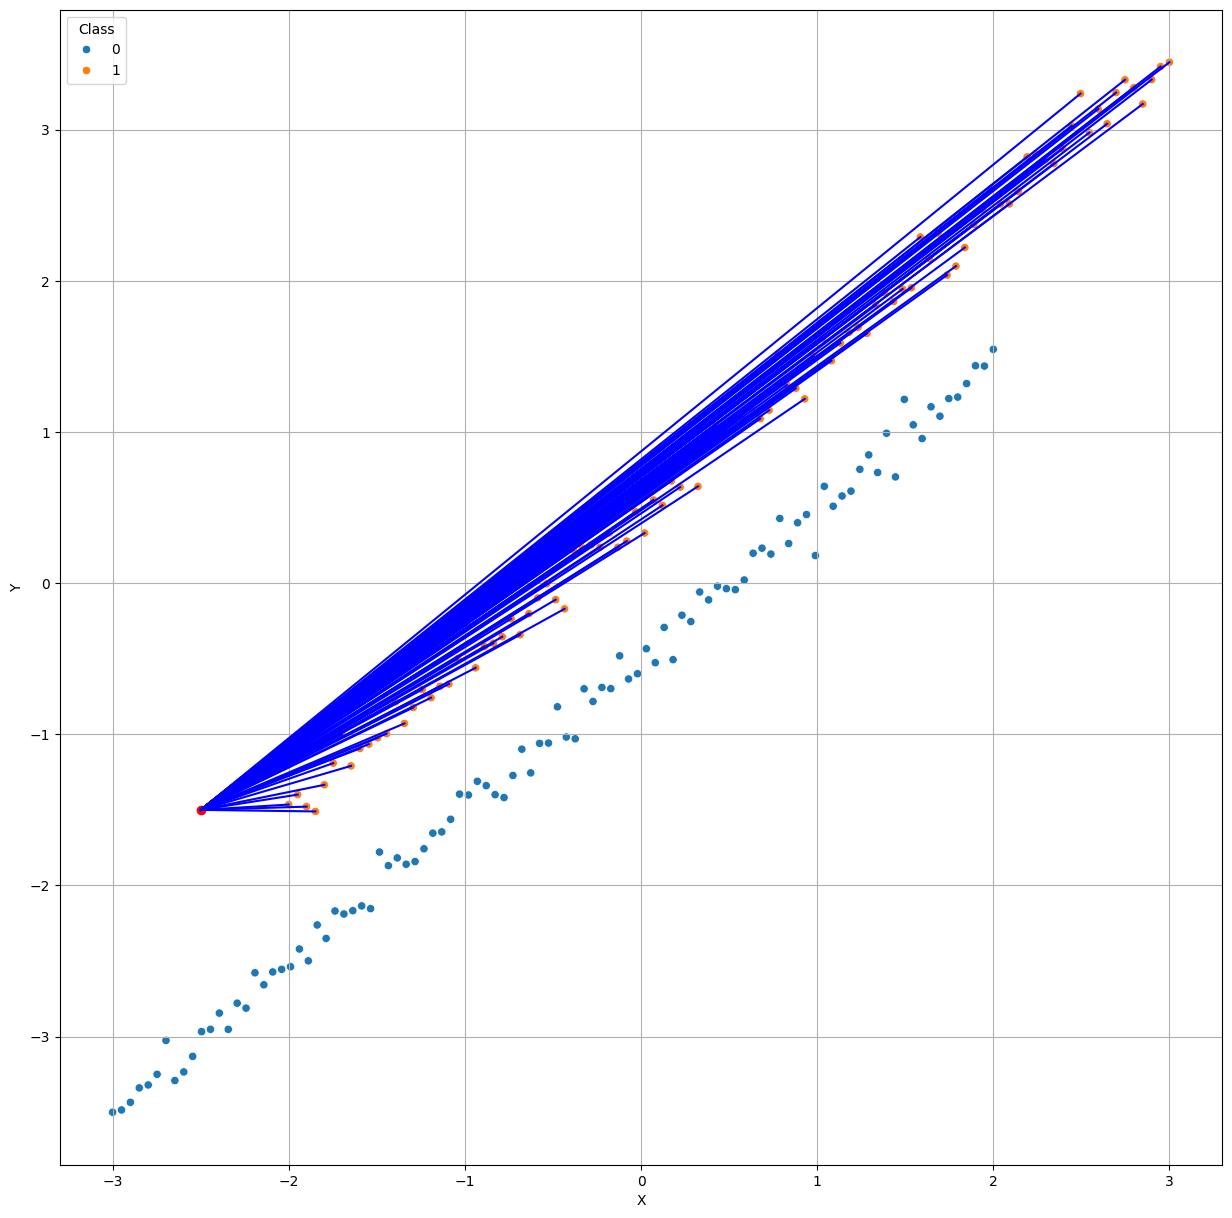

In [44]:
def sub_distance(point_1_x, point_1_y, point_2_x, point_2_y):
    return abs((point_1_x - point_1_y) - (point_2_x - point_2_y))


point = [-2.5, -1.5]
class_1 = np.stack(
    [[x, x - 0.5 + np.random.randn() / 10] for x in np.linspace(-3, 2, 100)]
)
class_2 = np.stack(
    [[x, x + 0.5 + np.random.randn() / 10] for x in np.linspace(-2, 3, 100)]
)
K = 100
KNN(point, class_1, class_2, K, sub_distance)


In [47]:
#в sklearn уже все есть
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import warnings

samples = [[0.0, 0.0, 0.0], [0.0, 0.5, 0.0], [1.0, 1.0, 0.5]]
y = [[1.0], [1.0], [0.0]]

neigh = KNeighborsClassifier(n_neighbors=1, p=2)
"""
В качестве параметров при инициализации алгоритма передаются:
  - n_neighbors: int, параметр отвечающий за выбранное число соседей (K)
  - p: int, параметр отвечающий за выбор метрики (как было разобрано выше)
  - metric: string or callable object. В качестве metric можно передать либо одну из фиксированного набора строк
    (этот набор можно посмотреть в официальной документации, либо обратившись к sklearn.metrics.pairwise.PAIRWISE_DISTANCE_FUNCTIONS, как в следующей ячейке),
    либо написать свою функцию расстояния и передать её в качестве аргумента

Остальные аргументы менее существенны для нас, однако с ними можно ознакомиться по ссылке:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
"""

neigh.fit(samples, y)

print(
    "RESULT: point was assigned to class "
    + str(int(neigh.predict([[1.0, 1.0, 1.0]])[0]))
)


RESULT: point was assigned to class 0


In [48]:
"""
Пример использования косинусного расстояния
"""
neigh = KNeighborsClassifier(n_neighbors=1, metric='cosine')
neigh.fit(samples, y)

print("RESULT: point was assigned to class " + str(int(neigh.predict([[1.,1.,1.]])[0])))

RESULT: point was assigned to class 0


In [ ]:
Лекция 2

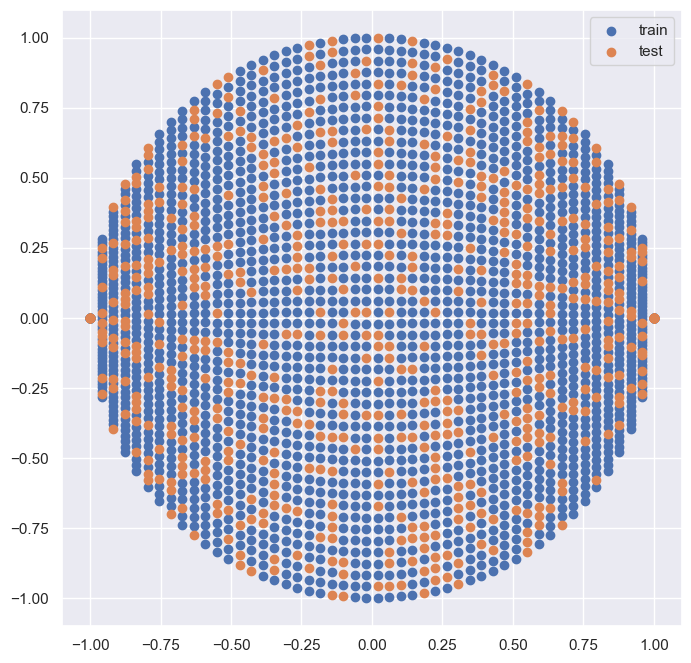

In [50]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

np.random.seed(42)

dataset = []
for x in np.linspace(-1, 1, 50):
    for y in np.linspace(-np.sqrt(1 - x**2), np.sqrt(1 - x**2), 50):
        dataset.append([x, y])

dataset = np.array(dataset)

y = np.sum(dataset, axis=-1)

X_train, x_test, y_train, y_test = train_test_split(dataset, y, test_size=0.25)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(x_test[:, 0], x_test[:, 1], label="test")
plt.legend()

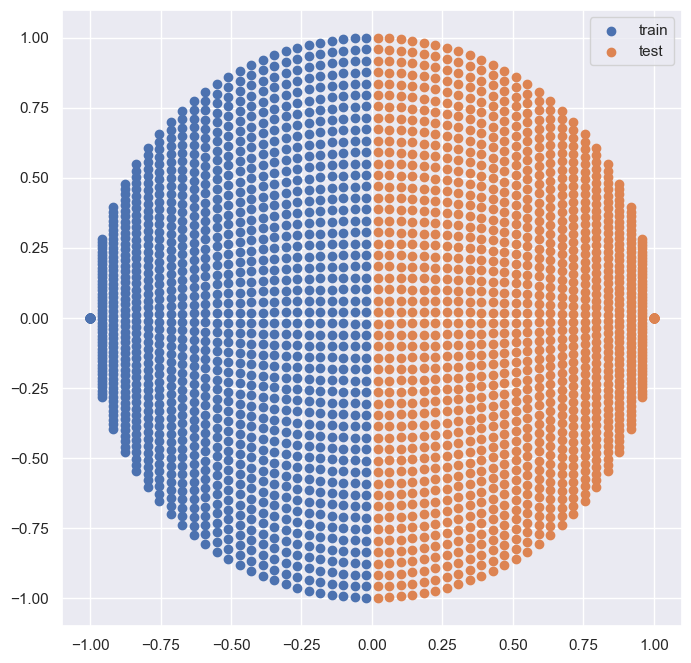

In [52]:
X_train, x_test, y_train, y_test = train_test_split(
    dataset, y, test_size=0.5, shuffle=False
)
plt.figure(figsize=(8, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], label="train")
plt.scatter(x_test[:, 0], x_test[:, 1], label="test")
plt.legend()

In [53]:
np.random.seed(42)

# Зададим синтетические метки классов с примерным соотношением 5% - 95%
Y_full =  np.random.choice([0, 1], size=[100], p=[0.95, 0.05])
(Y_full == 1).sum()

y_train, y_test = train_test_split(Y_full, test_size=0.2, random_state=42, stratify=Y_full)
(y_train == 1).sum()

4

In [ ]:
Урок №4

In [55]:
from sklearn.datasets import load_digits
mnist = load_digits()

mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

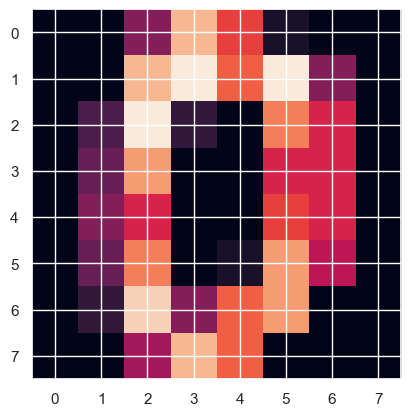

In [56]:
 import matplotlib.pyplot as plt
plt.imshow(mnist.images[0])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X, y = load_digits(return_X_y=True)

# Разбиение на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True )

# Предобработка
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# обучение модели
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [67]:
score = clf.score(X_test, y_test)
score

0.9722222222222222

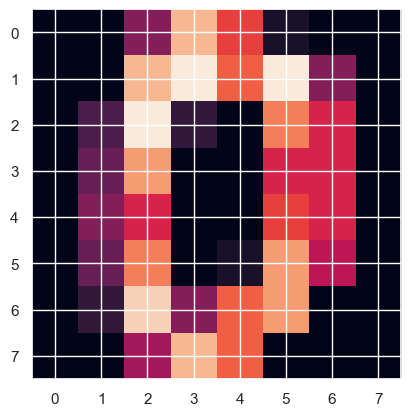

In [79]:
plt.imshow(mnist.images[0])

In [82]:
y_test[0]

7

In [85]:
print('Prediction of model is: ', clf.predict([X_test[0]])[0])

Prediction of model is:  7


In [ ]:
Разделяющая гиперплоскость

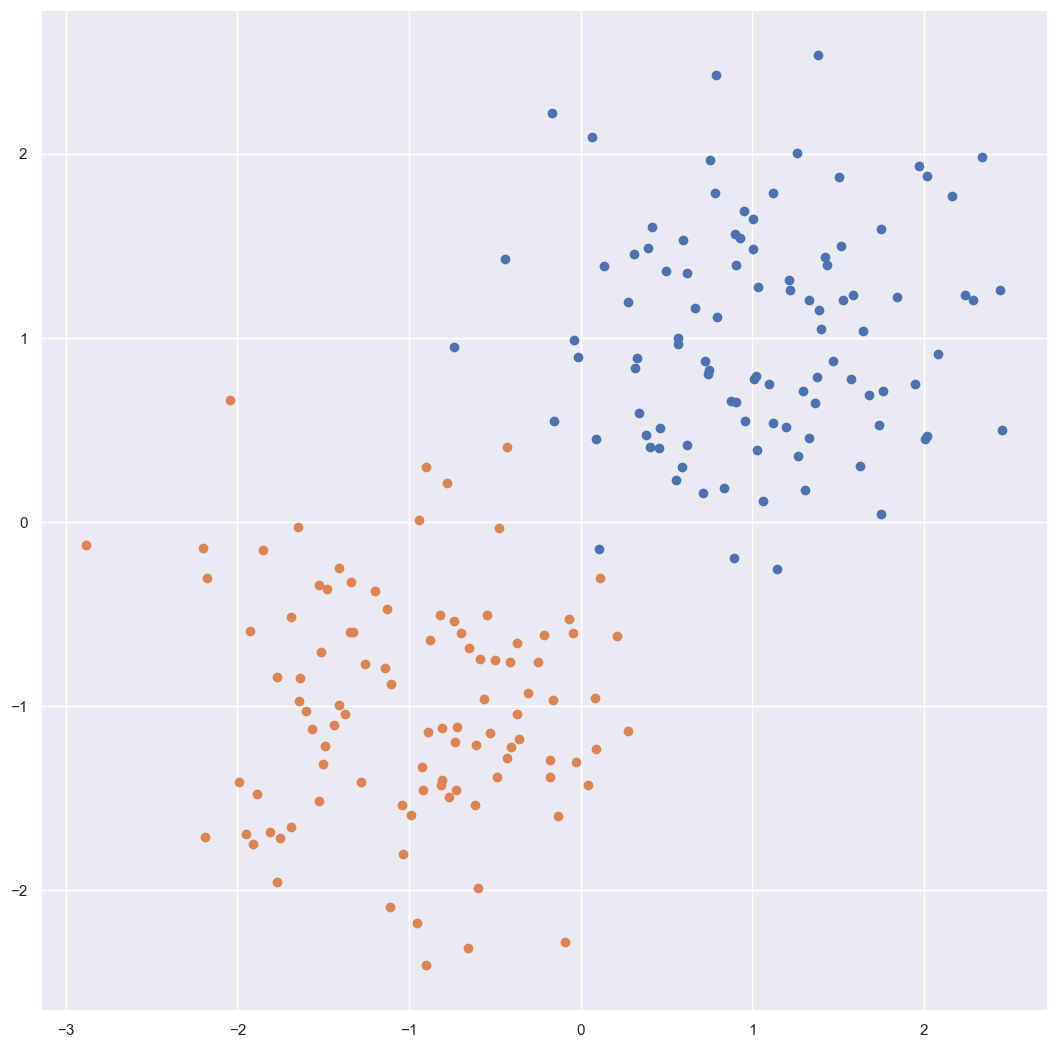

In [86]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Устанавливаем параметры визуализации
sns.set_theme()
# Генерируем выборки
class_1 = np.random.randn(100, 2)*0.6 + np.array([1., 1.])
class_2 = np.random.randn(100, 2)*0.6 - np.array([1., 1.])

# Рисуем их
plt.figure(figsize=(13, 13))
plt.scatter(class_1[:, 0], class_1[:, 1])
plt.scatter(class_2[:, 0], class_2[:, 1])

X = np.concatenate([class_1, class_2])
y = np.array([0 if i < 100 else 1 for i in range(200)])

# Обучаем модель
lr = LogisticRegression().fit(X, y)

In [87]:
lr.score(X, y)

0.99

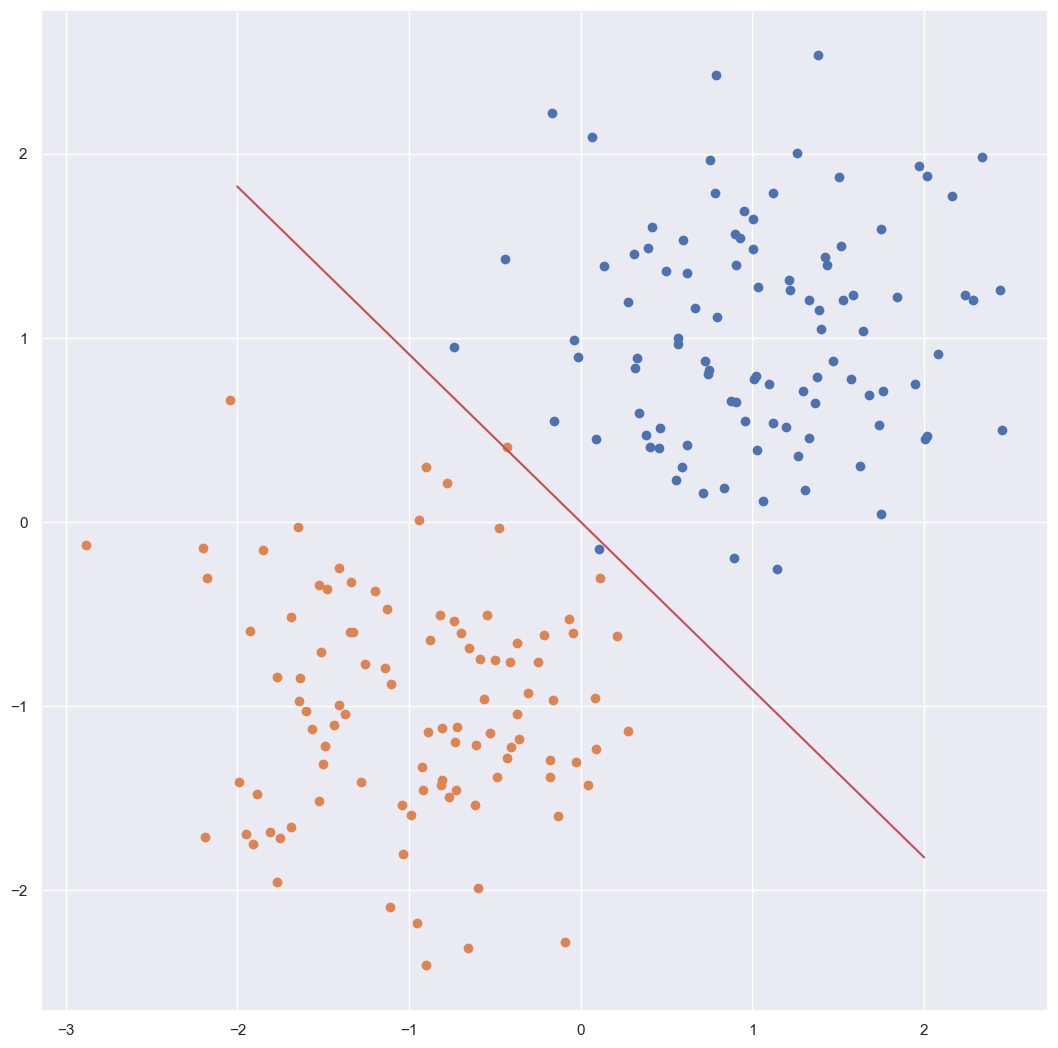

In [88]:
# Изобразим разделяющую гиперплоскость согласно обученной модели
x_ = np.array([-2, 2])
y_ = -lr.coef_[0][0] / lr.coef_[0][1] * x_

plt.figure(figsize=(13, 13))
plt.scatter(class_1[:, 0], class_1[:, 1])
plt.scatter(class_2[:, 0], class_2[:, 1])
plt.plot(x_, y_, c='r')

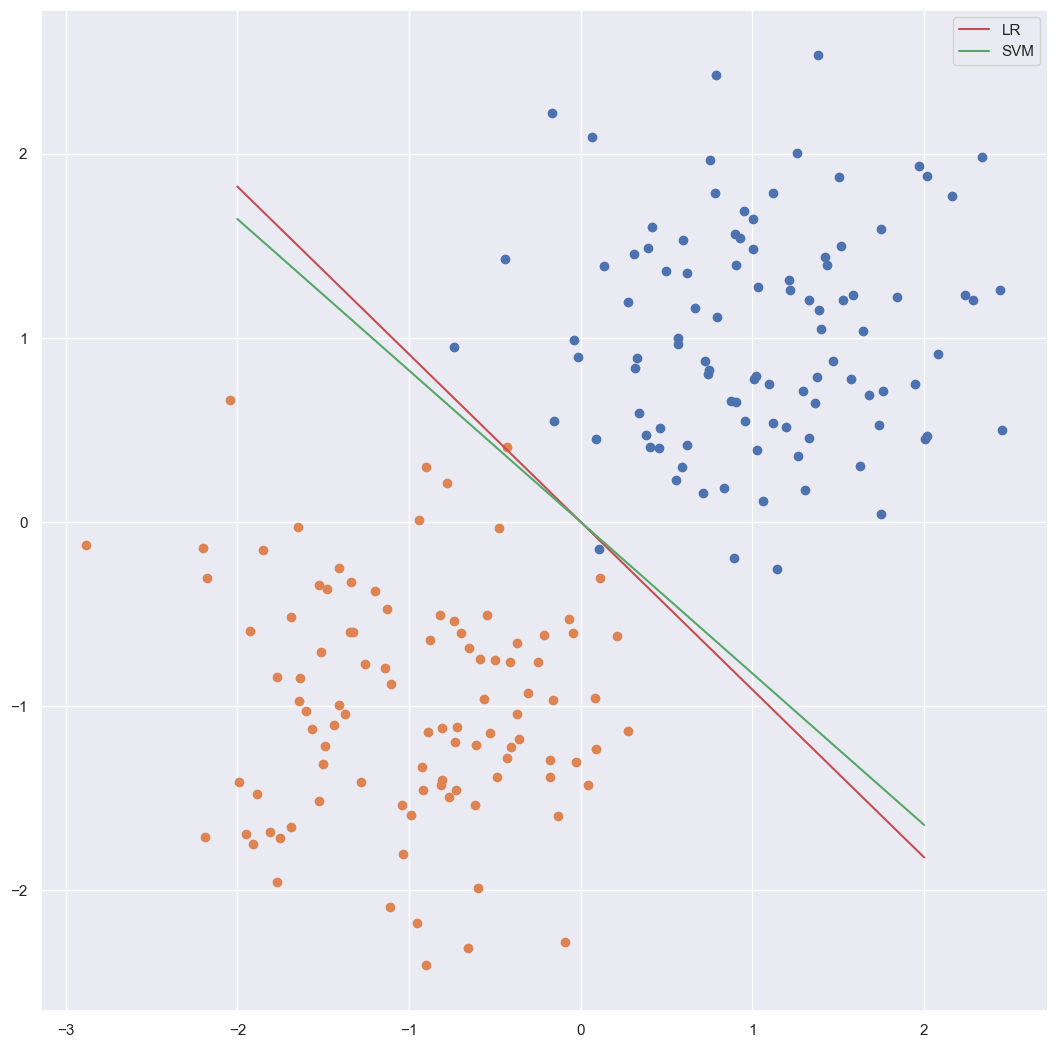

In [89]:
#Можно сделать то же самое и для SVM
from sklearn.svm import SVC

svm = SVC(kernel='linear').fit(X, y)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))


x_ = np.array([-2, 2])
y_lr = -lr.coef_[0][0] / lr.coef_[0][1] * x_
y_svm = -svm.coef_[0][0] / svm.coef_[0][1] * x_


fig, ax = plt.subplots(1, 1, figsize=(13, 13))
ax.scatter(class_1[:, 0], class_1[:, 1])
ax.scatter(class_2[:, 0], class_2[:, 1])
ax.plot(x_, y_lr, c='r', label='LR')
ax.plot(x_, y_svm, c='g', label='SVM')
legend_without_duplicate_labels(ax)
fig.show()

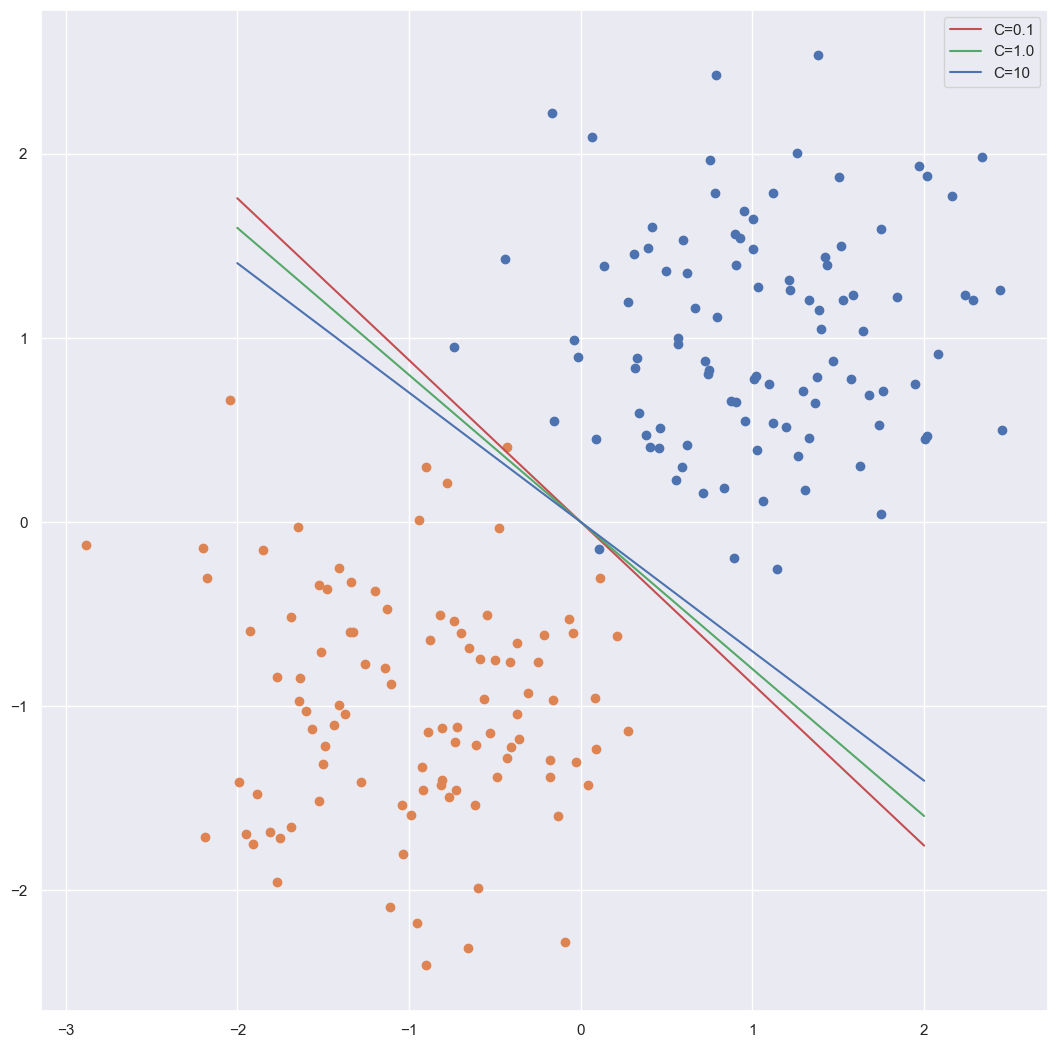

In [90]:
#зависимость модели от параметра С
from sklearn.svm import SVC

svm_1 = SVC(kernel='linear', C=0.1).fit(X, y)
svm_2 = SVC(kernel='linear', C=2.0).fit(X, y)
svm_3 = SVC(kernel='linear', C=10.0).fit(X, y)

y_svm_1 = -svm_1.coef_[0][0] / svm_1.coef_[0][1] * x_
y_svm_2 = -svm_2.coef_[0][0] / svm_2.coef_[0][1] * x_
y_svm_3 = -svm_3.coef_[0][0] / svm_3.coef_[0][1] * x_


fig, ax = plt.subplots(1, 1, figsize=(13, 13))
ax.scatter(class_1[:, 0], class_1[:, 1])
ax.scatter(class_2[:, 0], class_2[:, 1])
ax.plot(x_, y_svm_1, c='r', label='C=0.1')
ax.plot(x_, y_svm_2, c='g', label='C=1.0')
ax.plot(x_, y_svm_3, c='b', label='C=10')
legend_without_duplicate_labels(ax)
fig.show()

In [ ]:
Лекция 5

In [97]:
import warnings
warnings.filterwarnings('ignore')

In [110]:
#Here you need to take your own api key from kaggle
api_token = {"username": "ivan1864", "key": "756435de285d289014d50153c3e7d9c1"}


import json

with open("/Users/ivan/.kaggle/kaggle.json", "w") as file:
    json.dump(api_token, file)


In [113]:
!chmod 600 ~/.kaggle/kaggle.json

In [114]:
!kaggle competitions download -c competitive-data-science-predict-future-sales

 99%|█████████████████████████████████████▋| 15.0M/15.1M [00:02<00:00, 7.99MB/s]
100%|██████████████████████████████████████| 15.1M/15.1M [00:02<00:00, 6.60MB/s]


In [115]:
import pandas as pd
import zipfile

with zipfile.ZipFile(
    "./competitive-data-science-predict-future-sales.zip", "r"
) as zip_ref:
    zip_ref.extractall("./")

In [116]:
sales = pd.read_csv('./sales_train.csv')
sales.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0

In [117]:
# Выбираем нужный магазин
sales59 = sales[sales.shop_id == 59]

In [118]:
sales59.head()

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0      02.01.2013               0       59    22154       999.0           1.0
40084  10.01.2013               0       59    22151       399.0           1.0
77502  04.01.2013               0       59     5603       699.0           1.0
77503  19.01.2013               0       59     5587       199.0           2.0
77504  31.01.2013               0       59     5613      5571.0           1.0

In [122]:
# Переводим дату в нужный формат
sales59.date = pd.to_datetime(sales59.date, format = "%d.%m.%Y")

In [123]:
# Установим дату в качестве индекса
sales59['date_for_idx'] = sales59.date
sales59.set_index('date_for_idx', inplace=True)

In [124]:
sales59

date  date_block_num  shop_id  item_id  item_price  \
date_for_idx                                                            
2013-01-02   2013-01-02               0       59    22154       999.0   
2013-01-10   2013-01-10               0       59    22151       399.0   
2013-01-04   2013-01-04               0       59     5603       699.0   
2013-01-19   2013-01-19               0       59     5587       199.0   
2013-01-31   2013-01-31               0       59     5613      5571.0   
...                 ...             ...      ...      ...         ...   
2015-10-10   2015-10-10              33       59     4962       298.0   
2015-10-04   2015-10-04              33       59     4706       299.0   
2015-10-11   2015-10-11              33       59     5002      2999.0   
2015-10-15   2015-10-15              33       59     5233      1199.0   
2015-10-21   2015-10-21              33       59     5039      1499.0   

              item_cnt_day  
date_for_idx                
2013-01-02             1.0  
2013-01-10             1.0  
2013-01-04             1.0  
2013-01-19             2.0  
2013-01-31             1.0  
...                    ...  
2015-10-10             1.0  
2015-10-04             1.0  
2015-10-11             1.0  
2015-10-15             1.0  
2015-10-21             1.0  

[42108 rows x 6 columns]

In [125]:
# Выкидываем лишние столбцы
sales59 = sales59.drop(columns=['date_block_num', 'item_id', 'shop_id'])

# Считаем доход
sales59['income'] = sales59['item_price']*sales59['item_cnt_day']

In [126]:
# Рассмотрим только 2013 год
sales_59 = sales59[sales59.index.year == 2013]

#Берем все до октября включительно
sales_59 = sales_59[sales_59.index.month < 11]

#В качестве исторически накопленных знаний берем все до сентября включительно
sales_59_historic = sales_59[sales_59.index.month < 10]

#В качестве месяца для предсказания берем октябрь
sales_59_to_predict = sales_59[sales_59.index.month == 10]

#Отсортируем обучающую выборку по дате
sales_59_historic = sales_59_historic.sort_values(by = 'date')

#И тестовый месяц тоже
sales_59_to_predict = sales_59_to_predict.sort_values(by = 'date')

# Посчитаем накопленный доход
sales_59_historic['INC'] = sales_59_historic.income.cumsum()

<Axes: xlabel='date', ylabel='INC'>

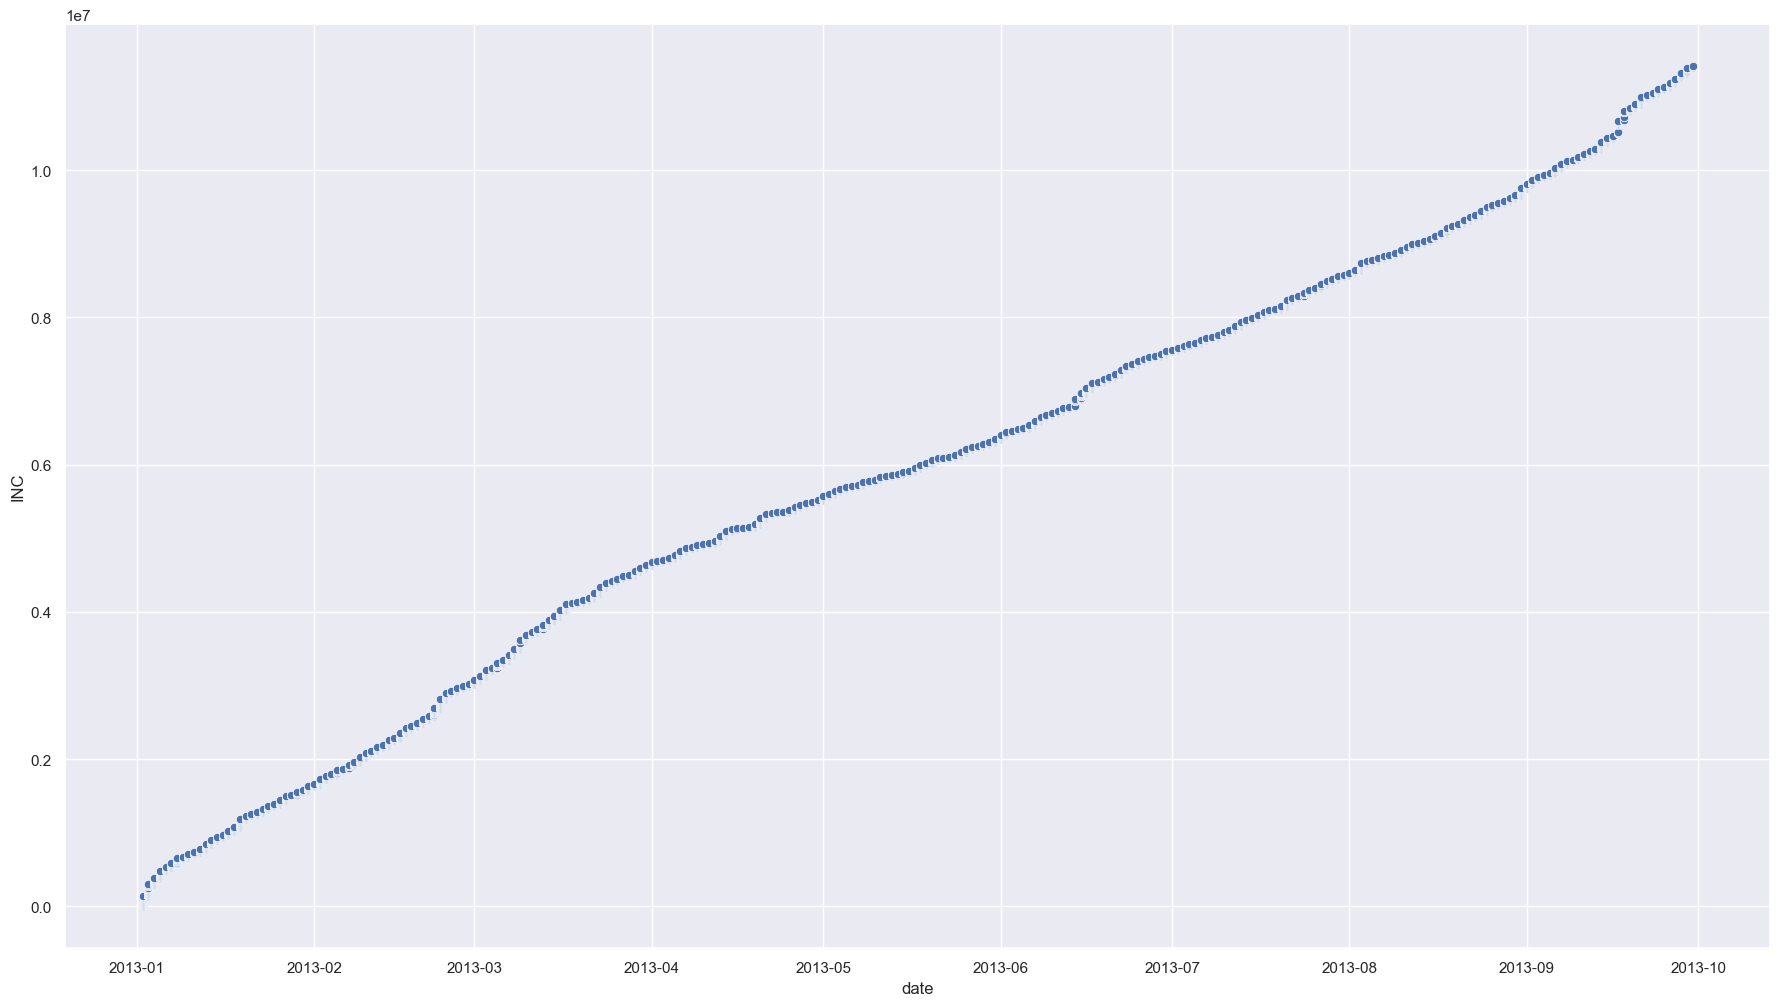

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.figure(figsize = (22,12))
sns.scatterplot(data=sales_59_historic,x='date', y='INC')

In [128]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Зададим список дней, в нашем случае именно они станут x координатой
days = np.arange(272).reshape(-1, 1)

# Зададим ежедневный доход при помощи pandas.resample
target = sales_59_historic.INC.resample("1D").agg("last")
target = target.values.reshape(-1, 1)


In [130]:
# Обучим LinearRegression
LR = LinearRegression().fit(days, target)

<Axes: xlabel='date', ylabel='INC'>

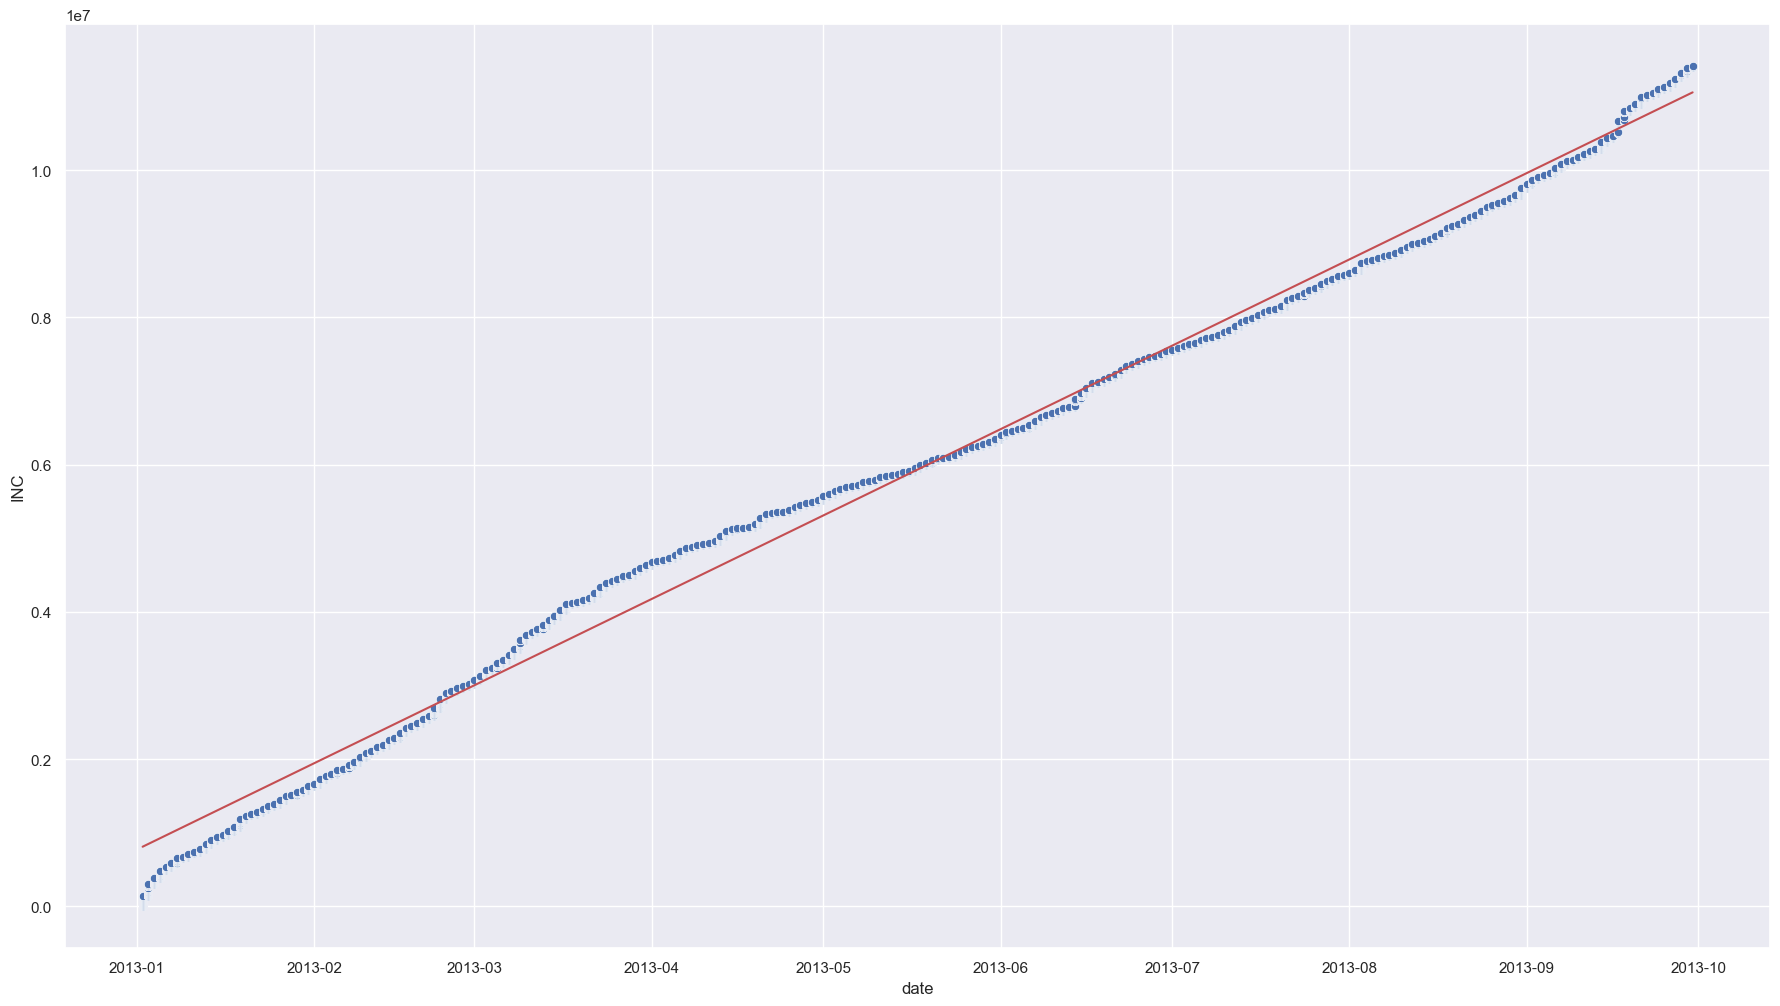

In [131]:
# Список тренировочных дней в формате datetime и предсказание
days_as_datetime = sales_59_historic["date"].resample("1D").agg("last")
predictions = LR.predict(days).reshape(-1)

# Зададим dataframe для использования с seaborn
predicted = pd.DataFrame({"date": days_as_datetime, "prediction": predictions})

# Нарисуем нашу прямую
plt.figure(figsize=(22, 12))

sns.scatterplot(data=sales_59_historic, x="date", y="INC")
sns.lineplot(data=predicted, x="date", y="prediction", color="r")

In [132]:
# Проверим, насколько предсказание нашей модели о доходе в октябре соотносится с реальностью
# Зададим интересующий нас день, то есть на месяц позже последнего значения в обучающей выборке
day = 272 + 31

# Сделаем предсказание на 303 день и вычтем значение накопленного дохода в начале месяца
prediction = LR.predict([[day]]) - sales_59_historic.INC[-1]

# Посчитаем доход в октябре, как сумму всех сделок
real_income = sales_59_to_predict.income.sum()

# Найдем ошибку предсказания и относительную ошибку
deviation = real_income - prediction
error_rate = deviation / real_income
print(
    f"Предсказание модели: {prediction} в то время как настоящее значение: {real_income}. Относительная ошибка предсказания: {error_rate}"
)

Предсказание модели: [[855272.78671388]] в то время как настоящее значение: 1404602.0. Относительная ошибка предсказания: [[0.39109243]]


In [ ]:
Лекция 6. Решающие деревья

In [133]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

# Добавляем точки на плоскости первого класса
np.seed = 10
train_data = np.random.normal(size=(50, 2))
train_data = np.r_[train_data, np.random.normal(size=(50, 2), loc=0.5, scale=2)]
train_labels = np.zeros(100)

# Добавляем точки второго класса
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=4, scale=2)]
train_labels = np.r_[train_labels, np.ones(100)]

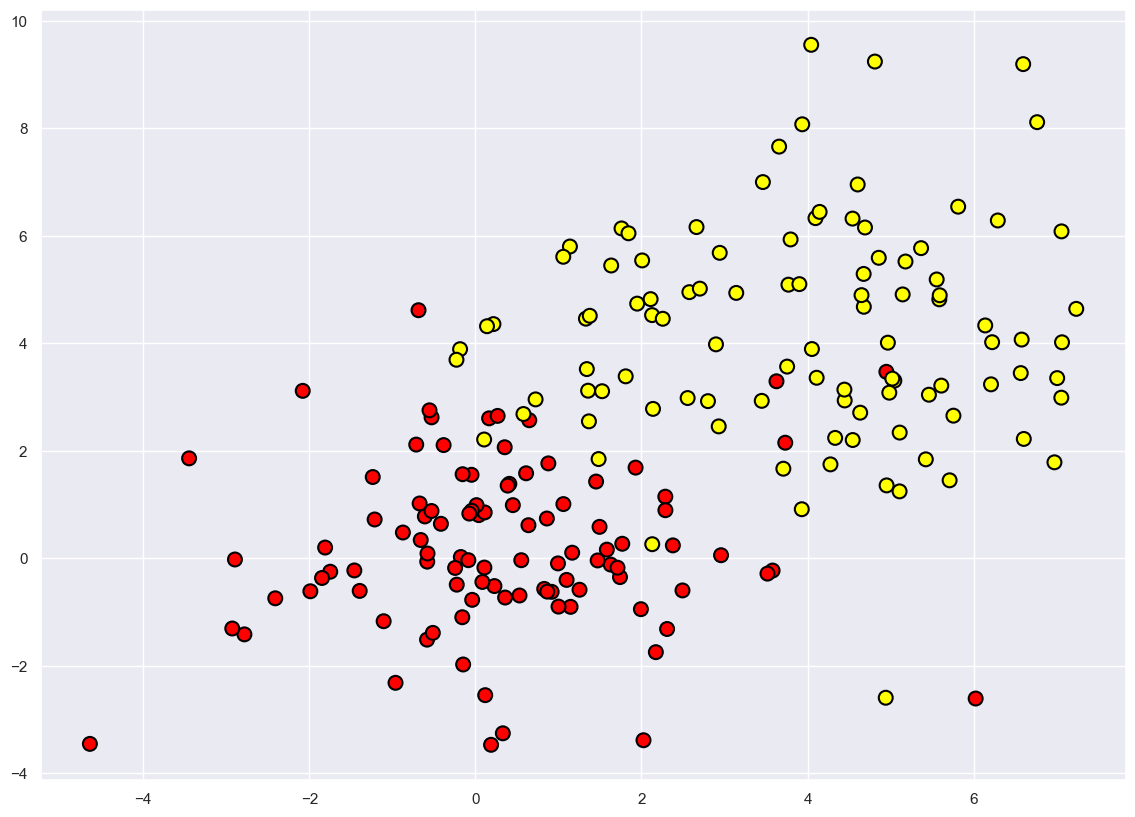

In [134]:
plt.rcParams["figure.figsize"] = (14, 10)
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
)

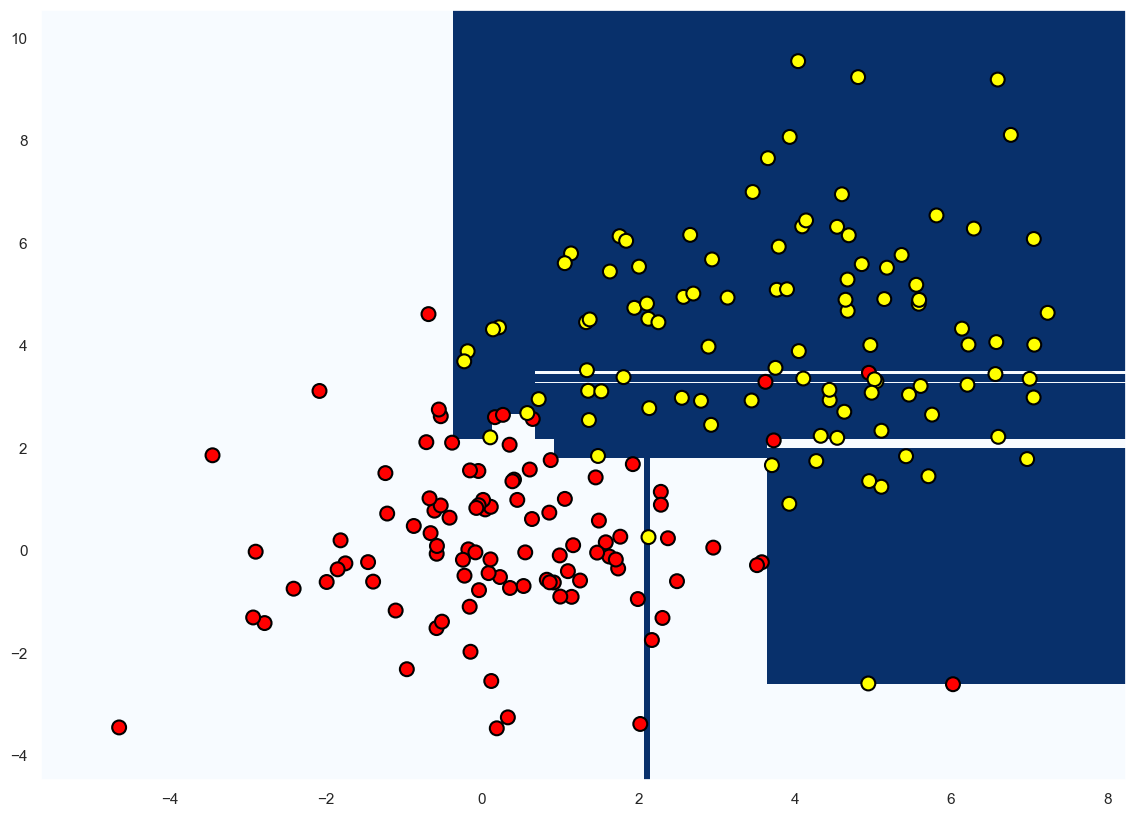

In [135]:
from sklearn.tree import DecisionTreeClassifier

# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации

def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=30, random_state=17)

# Обучение дерева
clf_tree.fit(train_data, train_labels)

# Разделяющая поверхность
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="Blues")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

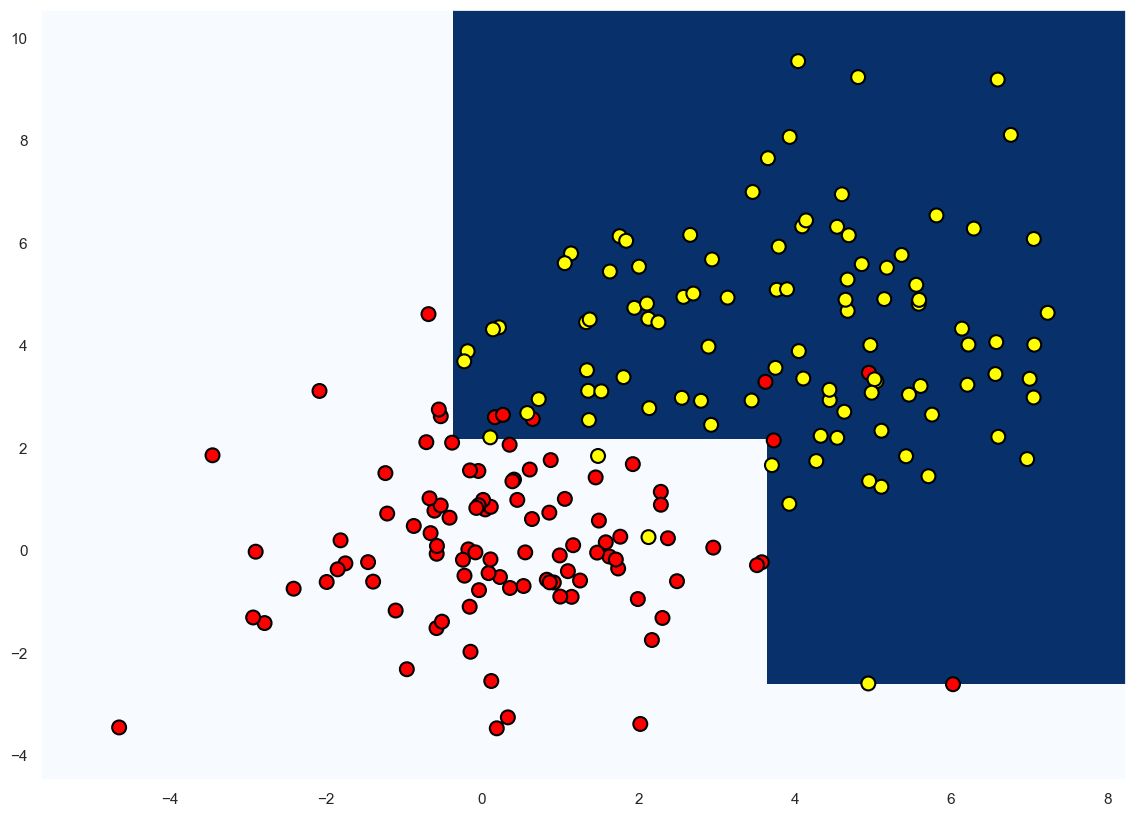

In [136]:
clf_tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=17)

# Обучение дерева
clf_tree.fit(train_data, train_labels)

# Разделяющая поверхность
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="Blues")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

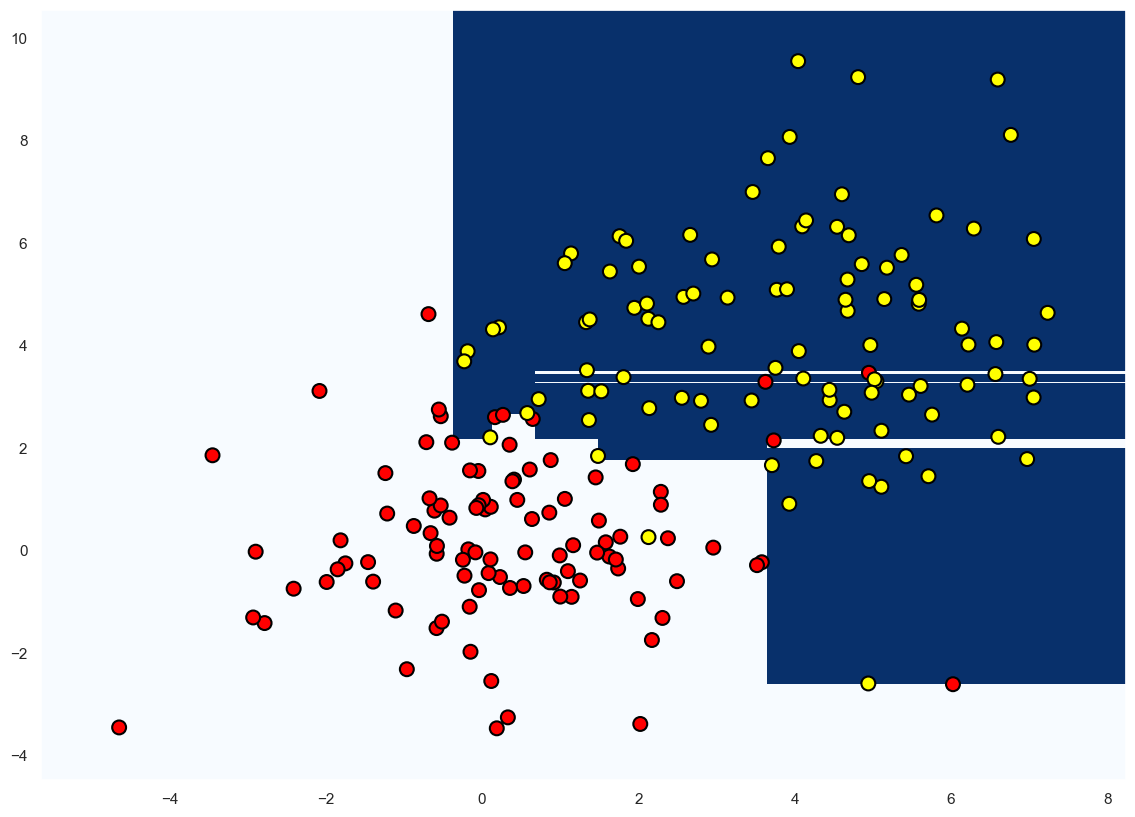

In [137]:
clf_tree = DecisionTreeClassifier(criterion="entropy", max_depth=30, random_state=17)

# Обучение дерева
clf_tree.fit(train_data, train_labels)

# Разделяющая поверхность
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap="Blues")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="autumn",
    edgecolors="black",
    linewidth=1.5,
);

In [138]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics

iris = datasets.load_iris()
iris.feature_names

df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df["target"] = iris.target
df["name"] = df.target.apply(lambda x: iris.target_names[x])
df

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target       name  
0         0     setosa  
1         0     setosa  
2         0     setosa  
3         0     setosa  
4         0     setosa  
..      ...        ...  
145       2  virginica  
146       2  virginica  
147       2  virginica  
148       2  virginica  
149       2  virginica  

[150 rows x 6 columns]

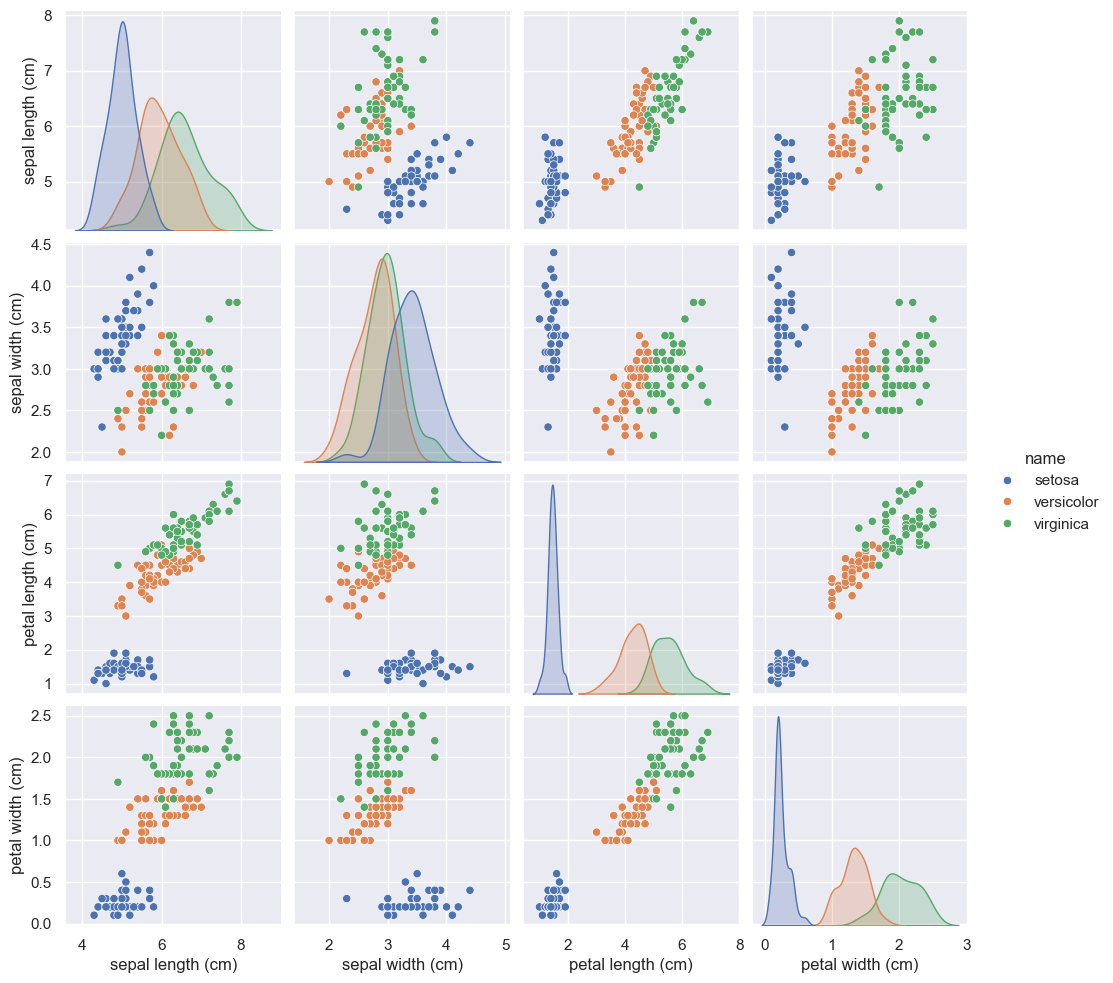

In [139]:
sns.pairplot(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)', 'name']], hue = 'name')

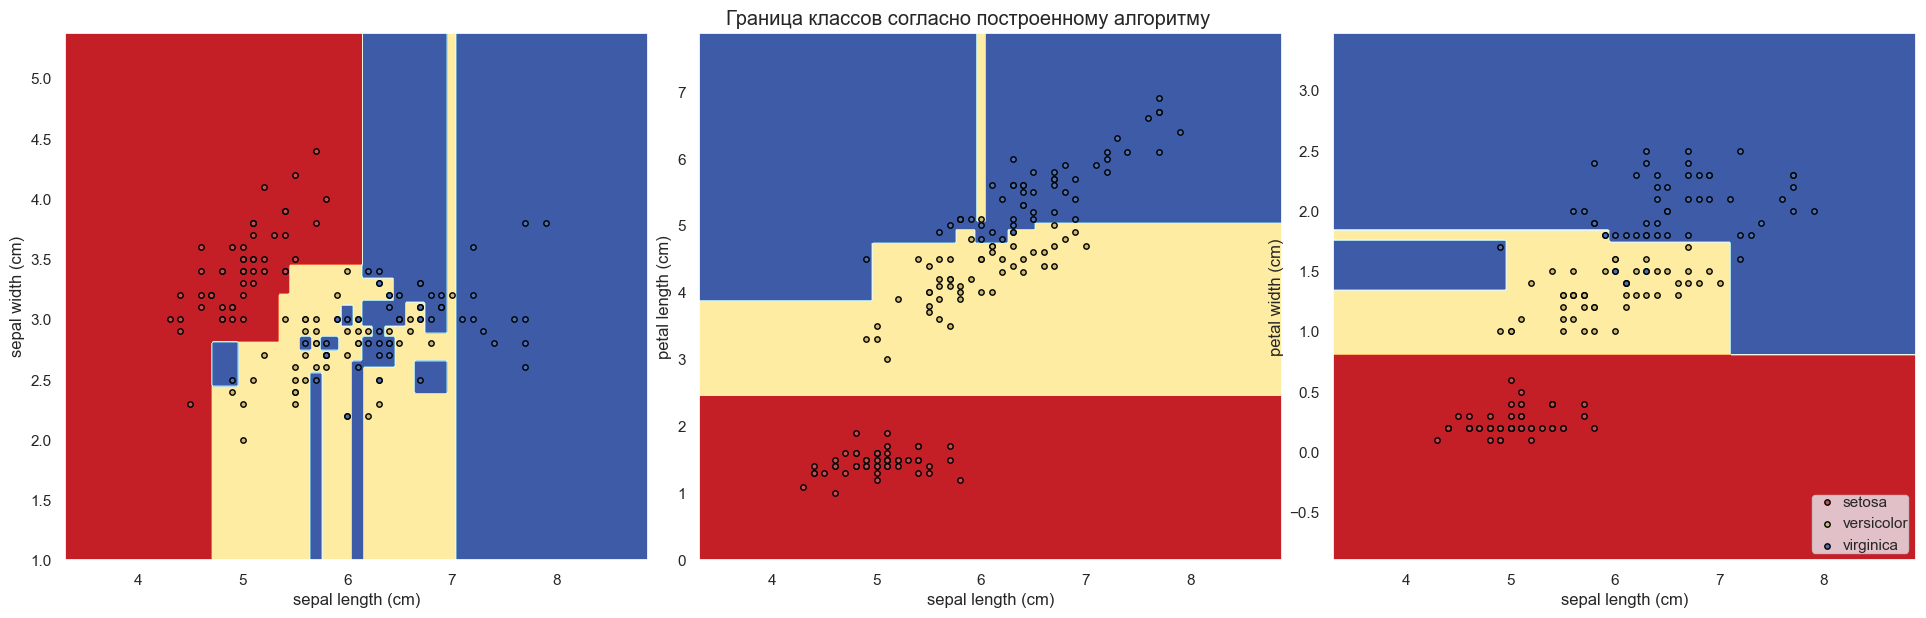

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Задаём параметры
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
plt.figure(figsize=(20, 12))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3]]):
    # Выбираем текущую пару признаков
    X = iris.data[:, pair]
    y = iris.target

    # Тренируем модель
    clf = DecisionTreeClassifier(max_depth=40).fit(X, y)

    # Изобразим границу классов
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Визуализация
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Граница классов согласно построенному алгоритму")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)

In [148]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
import tqdm
from tqdm.auto import tqdm

X, y = fetch_california_housing(return_X_y=True)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

scores = []
train_scores = []
for max_d in tqdm(range(2, 100)):
    reg = DecisionTreeRegressor(max_depth=max_d)
    reg.fit(X_train, y_train)
    test_score = reg.score(x_test, y_test)
    train_scores.append(reg.score(X_train, y_train))
    scores.append(test_score)

  0%|          | 0/98 [00:00<?, ?it/s]

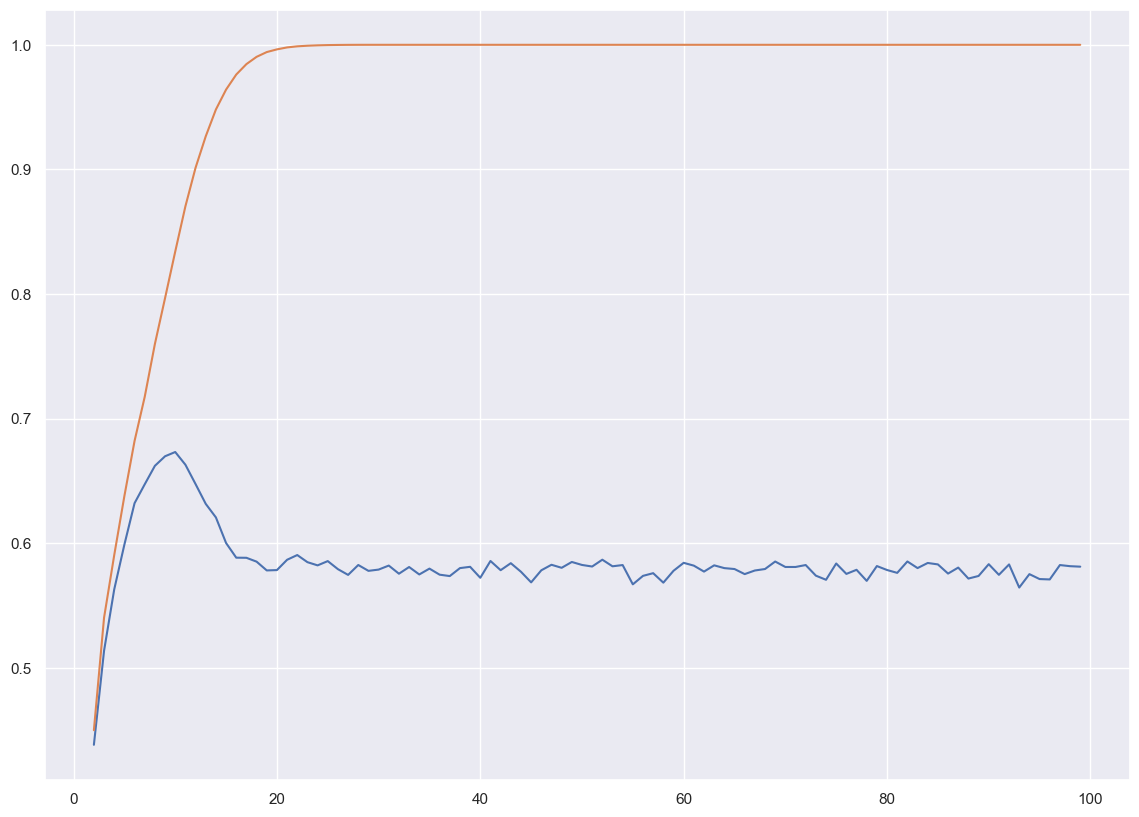

In [149]:
from matplotlib import pyplot as plt

plt.plot(list(range(2, 100)), scores)
plt.plot(list(range(2, 100)), train_scores)

In [153]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Предобработаем данные для логистической регрессии
from sklearn.preprocessing import StandardScaler

X, y = load_breast_cancer(return_X_y=True)

X_scaled = StandardScaler().fit_transform(X) # Поправить

X_train, x_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, shuffle=True, random_state=1917
)

In [155]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
knn_clf = KNeighborsClassifier().fit(X_train, y_train)
linear_clf = LogisticRegression().fit(X_train, y_train)

predictions_tree = tree_clf.predict(x_test)
predictions_knn = knn_clf.predict(x_test)
predictions_linear = linear_clf.predict(x_test)

accuracy_tree = accuracy_score(predictions_tree, y_test)
accuracy_knn = accuracy_score(predictions_knn, y_test)
accuracy_linear = accuracy_score(predictions_linear, y_test)

print(f'Accuracy of tree classifier: {accuracy_tree}\nAccuracy of knn classifier: {accuracy_knn}\nAccuracy of linear classifier: {accuracy_linear}')


Accuracy of tree classifier: 0.9473684210526315
Accuracy of knn classifier: 0.9824561403508771
Accuracy of linear classifier: 0.9824561403508771


In [156]:
from sklearn.ensemble import RandomForestClassifier

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(x_test)

accuracy_score(y_pred, y_test)

0.9649122807017544

In [157]:
from sklearn.ensemble import GradientBoostingClassifier

# зададим алгоритм для новой модели на основе алгоритма градиентного бустинга
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(x_test)

accuracy_score(y_pred, y_test)

0.9766081871345029

In [158]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

X, y = housing.data, housing.target
X_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=42
)
X.shape

(20640, 8)

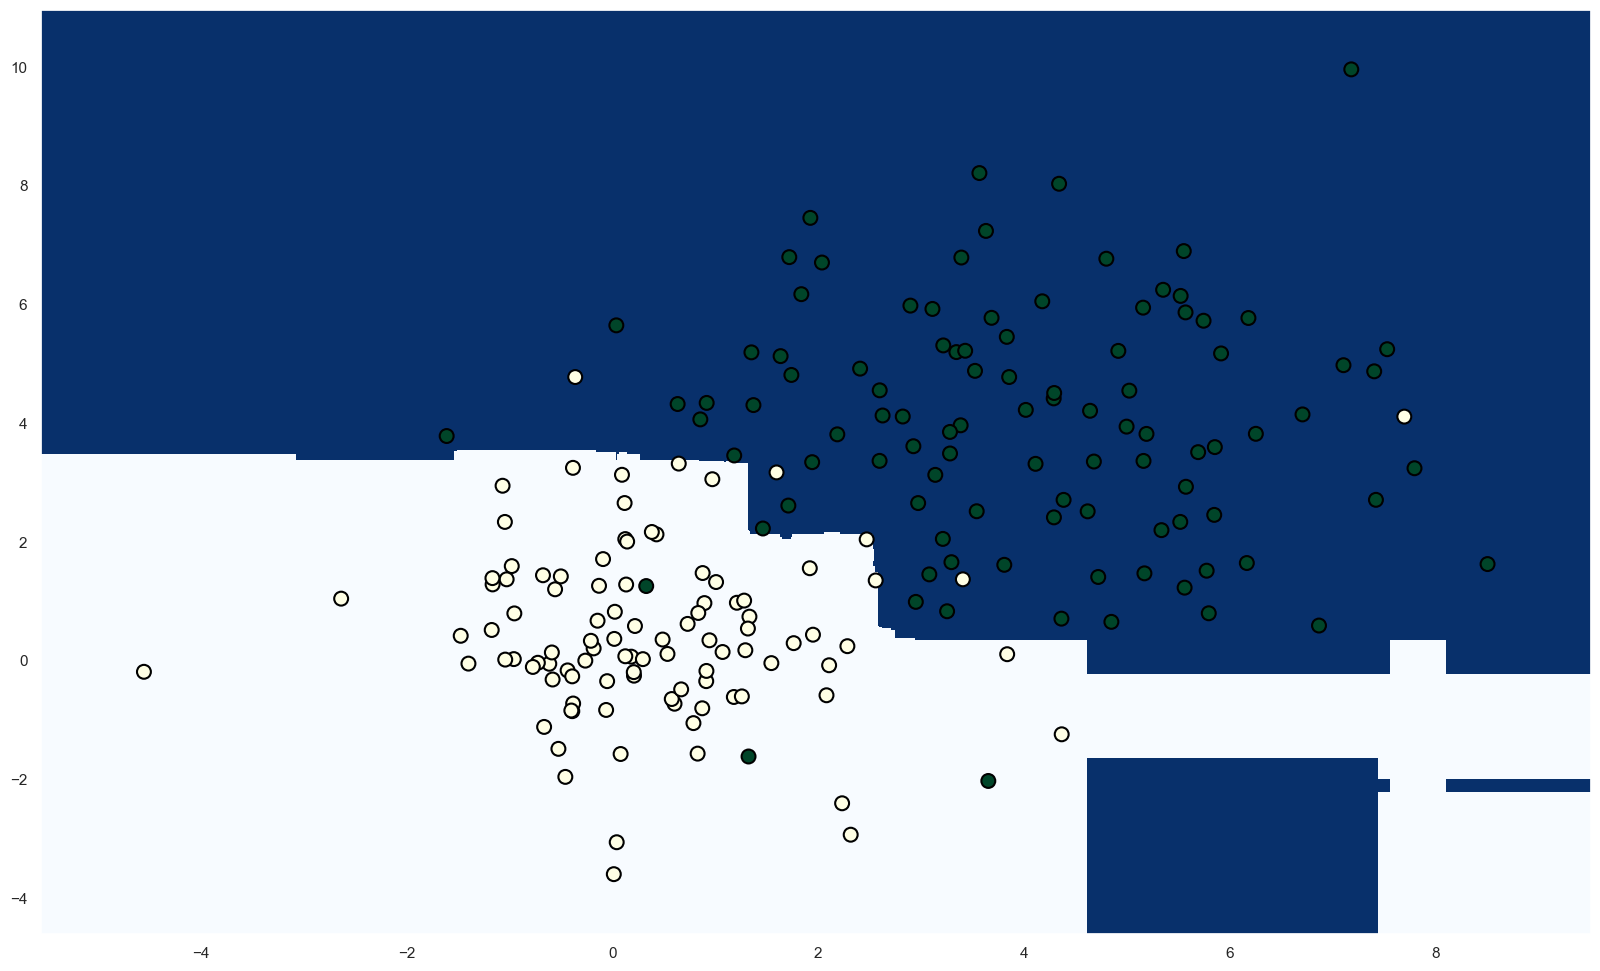

In [164]:
# Добавляем точки на плоскости первого класса
np.seed = 10
train_data = np.random.normal(size=(50, 2))
train_data = np.r_[train_data, np.random.normal(size=(50, 2), loc=0.5, scale=2)]
train_labels = np.zeros(100)

# Добавляем точки второго класса
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=4, scale=2)]
train_labels = np.r_[train_labels, np.ones(100)]


#%%time
from sklearn.ensemble import RandomForestClassifier

# Обучение алгоритма
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3)
rf_model.fit(train_data, train_labels)

# Разделяющая поверхность
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


xx, yy = get_grid(train_data)
predicted = rf_model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(20, 12))
plt.pcolormesh(xx, yy, predicted, cmap="Blues")
plt.scatter(
    train_data[:, 0],
    train_data[:, 1],
    c=train_labels,
    s=100,
    cmap="YlGn",
    edgecolors="black",
    linewidth=1.5,
);


In [ ]:
Лекция 8 

In [167]:
# Построим PR-curve и посчитаем площадь под ней самостоятельно и при помощи функций из sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

X, y = load_breast_cancer(return_X_y = True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

sc = StandardScaler()
sc.fit(X_train)
X_train, X_test = sc.transform(X_train), sc.transform(X_test)

LR = LogisticRegression().fit(X_train, y_train)

import pandas as pd
import numpy as np
probas = LR.predict_proba(X_test)[:,1]
infotable = pd.DataFrame({'proba': probas,
                          'y_true': y_test})
infotable

proba  y_true
0    0.864902       1
1    0.000022       0
2    0.003910       0
3    0.999229       1
4    0.999888       1
..        ...     ...
183  0.015121       0
184  0.000318       0
185  0.049714       0
186  0.415324       1
187  0.915561       1

[188 rows x 2 columns]

In [168]:
set(infotable.proba)

{2.0491782622334234e-12,
 9.022488611183151e-12,
 5.2844567051469215e-11,
 3.4467470004989787e-10,
 6.983604198127679e-10,
 4.675274796633222e-09,
 6.23843532189849e-09,
 6.899525407662474e-09,
 9.644253503568826e-09,
 1.591409254901837e-08,
 1.9179398362009722e-08,
 2.0372462137514423e-08,
 2.368619642411683e-08,
 1.4984889357739088e-07,
 5.78097116573895e-07,
 9.870181672900761e-07,
 1.7424989319478685e-06,
 2.2497753807857405e-06,
 2.530868772994073e-06,
 2.799937748697366e-06,
 2.8756388333128815e-06,
 3.6512184934978795e-06,
 6.877119971764381e-06,
 2.0286118872311034e-05,
 2.2365123383894427e-05,
 2.2667523343893485e-05,
 3.9463511690149045e-05,
 0.00012598002886719155,
 0.00015416852621646387,
 0.00017154513423849917,
 0.0001726048751577453,
 0.00017787358891690257,
 0.00019135213732474329,
 0.0002450213094670556,
 0.0003175194076833623,
 0.0004722215692831772,
 0.0005743340901831908,
 0.0007384401518817659,
 0.0009174887424285799,
 0.0010024190690350674,
 0.0010883658534095368,

In [169]:
for prob in set(infotable.proba):
    infotable[f"predicted_threshold_{prob}"] = (infotable.proba.values >= prob).astype(int)

In [170]:
infotable

proba  y_true  predicted_threshold_0.9992285941581798  \
0    0.864902       1                                       0   
1    0.000022       0                                       0   
2    0.003910       0                                       0   
3    0.999229       1                                       1   
4    0.999888       1                                       1   
..        ...     ...                                     ...   
183  0.015121       0                                       0   
184  0.000318       0                                       0   
185  0.049714       0                                       0   
186  0.415324       1                                       0   
187  0.915561       1                                       0   

     predicted_threshold_0.5684615376250639  \
0                                         1   
1                                         0   
2                                         0   
3                                         1   
4                                         1   
..                                      ...   
183                                       0   
184                                       0   
185                                       0   
186                                       0   
187                                       1   

     predicted_threshold_0.9988773420742354  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         1   
..                                      ...   
183                                       0   
184                                       0   
185                                       0   
186                                       0   
187                                       0   

     predicted_threshold_0.9405248282647318  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         1   
..                                      ...   
183                                       0   
184                                       0   
185                                       0   
186                                       0   
187                                       0   

     predicted_threshold_0.9928070945308816  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         1   
..                                      ...   
183                                       0   
184                                       0   
185                                       0   
186                                       0   
187                                       0   

     predicted_threshold_0.17224066703117336  \
0                                          1   
1                                          0   
2                                          0   
3                                          1   
4                                          1   
..                                       ...   
183                                        0   
184                                        0   
185                                        0   
186                                        1   
187                                        1   

     predicted_threshold_0.9999987578243525  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
..                                      ...   
183                                       0   
184           

In [171]:
precisions = [
    precision_score(infotable["y_true"], infotable[f"predicted_threshold_{prob}"])
    for prob in set(infotable.proba)
]
recalls = [
    recall_score(infotable["y_true"], infotable[f"predicted_threshold_{prob}"])
    for prob in set(infotable.proba)
]

prec_rec_table = pd.DataFrame({"precision": precisions, "recall": recalls})
prec_rec_table = prec_rec_table.sort_values(
    by=["recall", "precision"], ascending=[True, False]
)
prec_rec_table

precision    recall
127   1.000000  0.008264
6     1.000000  0.016529
125   1.000000  0.024793
17    1.000000  0.033058
82    1.000000  0.041322
..         ...       ...
132   0.657609  1.000000
161   0.654054  1.000000
145   0.650538  1.000000
120   0.647059  1.000000
121   0.643617  1.000000

[188 rows x 2 columns]

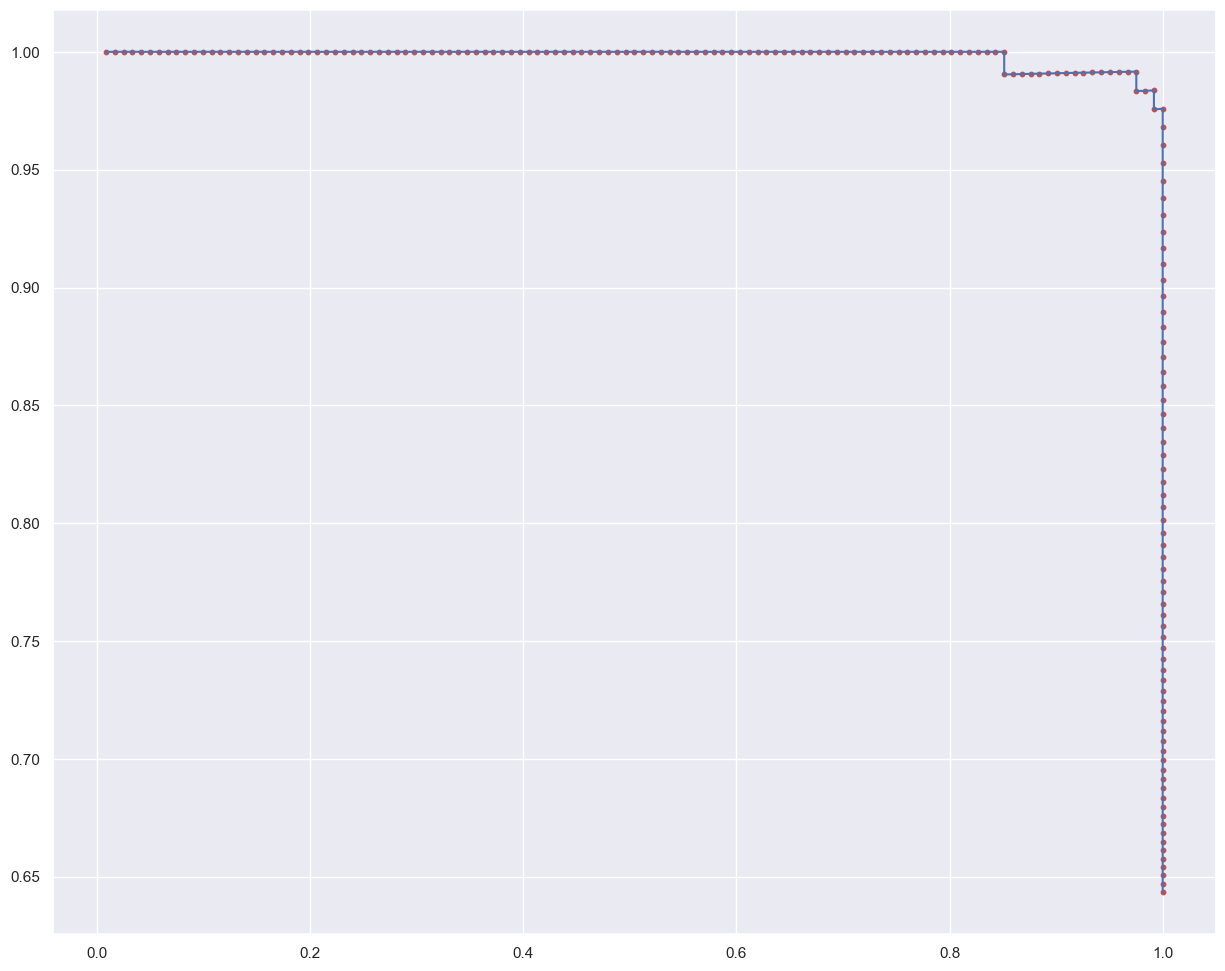

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

plt.figure(figsize=(15, 12))
plt.plot(prec_rec_table.recall, prec_rec_table.precision)
plt.scatter(prec_rec_table.recall, prec_rec_table.precision, c="r", s=10)

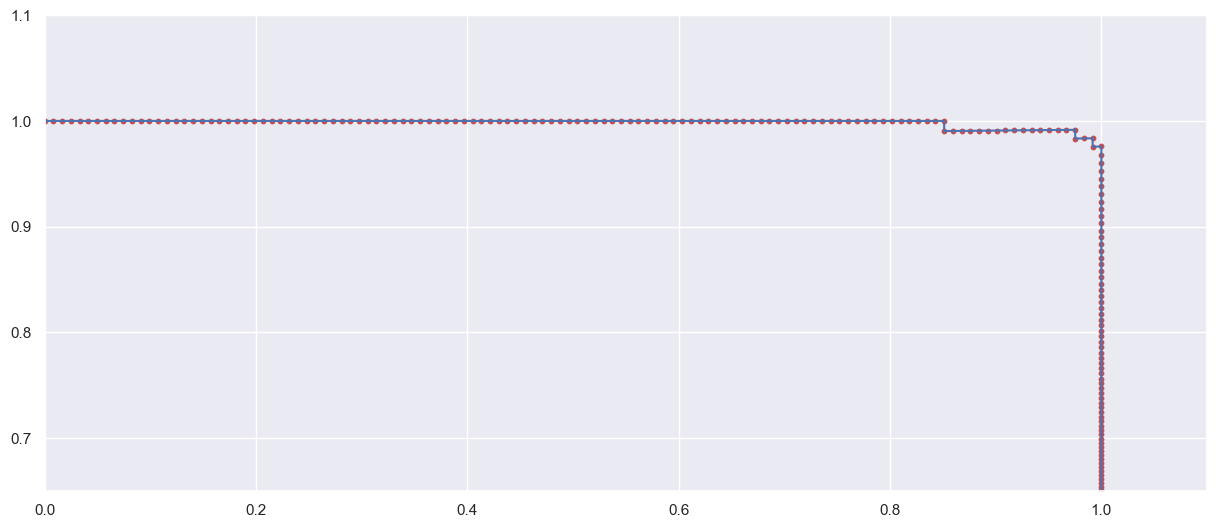

In [173]:
# все тоже самое, только гораздо проще
from sklearn.metrics import precision_recall_curve, roc_curve

precision, recall, thresholds = precision_recall_curve(y_test, probas)

plt.figure(figsize=(15, 12))
plt.plot(recall, precision)
plt.scatter(recall, precision, c="r", s=10)
plt.gca().set_aspect("equal")
plt.xlim([0.0, 1.1])
plt.ylim([0.65, 1.1])
plt.show()

In [175]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier as KNN

predictions_lr = LR.predict_proba(X_test)
predictions_knn = KNN.predict_proba(X_test)

plt.figure(figsize=(15, 10))
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, predictions_lr[:, 1])
plt.plot(fpr_lr, tpr_lr, color="darkorange", lw=3, label="ROC-curve for LR")

fpr_knn, tpr_knn, thresholds = roc_curve(y_test, predictions_knn[:, 1])
plt.plot(fpr_knn, tpr_knn, color="blue", lw=3, label="ROC-curve for KNN")

fpr_knn, tpr_knn, thresholds = roc_curve(
    y_test, np.random.uniform(0, 1, y_test.shape[0])
)
plt.plot(fpr_knn, tpr_knn, color="green", lw=3, label="ROC-curve for Random")

plt.fill_between(fpr_lr, tpr_lr, color="papayawhip")
plt.fill_between(fpr_knn, tpr_knn, color="aquamarine", alpha=0.5)
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend()
plt.show()

TypeError: KNeighborsClassifier.predict_proba() missing 1 required positional argument: 'X'

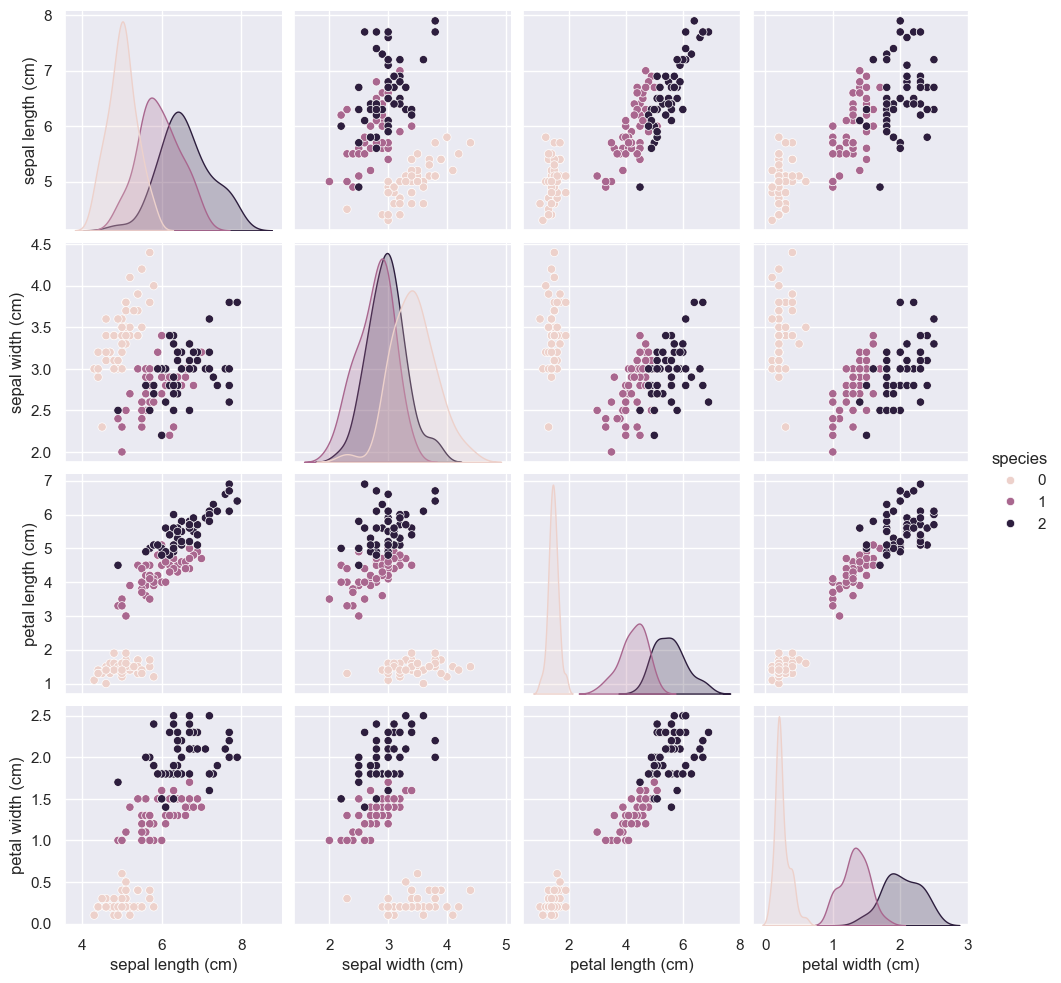

In [176]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris["feature_names"])
data["species"] = iris.target
sc = StandardScaler()

X, y = load_iris(return_X_y=True)
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)
X_train = sc.fit_transform(X_train)
x_test = sc.transform(x_test)

sns.pairplot(data=data, hue="species")

In [177]:
y_0_train = (y_train == 0).astype(int)
y_1_train = (y_train == 1).astype(int)
y_2_train = (y_train == 2).astype(int)

y_0_test = (y_test == 0).astype(int)
y_1_test = (y_test == 1).astype(int)
y_2_test = (y_test == 2).astype(int)

LR_0 = LogisticRegression().fit(X_train, y_0_train)
LR_1 = LogisticRegression().fit(X_train, y_1_train)
LR_2 = LogisticRegression().fit(X_train, y_2_train)

In [178]:
x = x_test[0]
x

array([ 0.58246136, -1.26207644,  0.66505094,  0.44115312])

In [181]:
# Ответ первого классификатора
p_0 = LR_0.predict_proba([x])[0][1]
p_0




0.0022405385526254227

In [182]:
# Ответ второго классификатора
p_1 = LR_1.predict_proba([x])[0][1]
p_1


0.7120035939082479

In [183]:
# Ответ третьего классификатора
p_2 = LR_2.predict_proba([x])[0][1]
p_2


0.43809356063766564

In [184]:
prediction = np.argmax([p_0, p_1, p_2])
prediction

1

In [185]:
y_test[0] == prediction

True

In [186]:
p_0 = LR_0.predict_proba(x_test)[:,1]
p_1 = LR_1.predict_proba(x_test)[:,1]
p_2 = LR_2.predict_proba(x_test)[:,1]

probas = np.stack([p_0, p_1, p_2])
preds = np.argmax(probas, axis=0)
preds

array([1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0,
       2, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 0, 0,
       0])

In [187]:
accuracy_score(preds, y_test)

0.9111111111111111

In [188]:
# Пара 0-1
# Здесь мы выкидываем все объекы 2 класса
x_train_01 = X_train[y_train!=2]
y_train_01 = y_train[y_train!=2]

# Пара 0-2
# Здесь мы выкидываем все объекы 1 класса
x_train_02 = X_train[y_train!=1]
y_train_02 = y_train[y_train!=1]

# Пара 1-2
# Здесь мы выкидываем все объекы 0 класса
x_train_12 = X_train[y_train!=0]
y_train_12 = y_train[y_train!=0]

# Обучаем 3 модели
LR_01 = LogisticRegression().fit(x_train_01, y_train_01)
LR_02 = LogisticRegression().fit(x_train_02, y_train_02)
LR_12 = LogisticRegression().fit(x_train_12, y_train_12)

#Введем такое обозначение: p_ij - j-я по номеру вероятность принадлежности объекта классу i
p_01, p_11 = LR_01.predict_proba([x])[0]
p_02, p_21 = LR_02.predict_proba([x])[0]
p_12, p_22 = LR_12.predict_proba([x])[0]


In [189]:
#Тогда суммарная степень принадлежности объекта классу 0:
p_01 + p_02

0.031845406243204644

In [190]:
#Классу 1:
p_11 + p_12

1.5590818174095786

In [191]:
#Классу 2:
p_21 + p_22

1.4090727763472166

In [192]:
#Сделаем то же самое для всех объектов тестовой выборки.

P0 = LR_01.predict_proba(x_test)
p_01, p_11 = P0[:, 0], P0[:, 1]

P1 = LR_02.predict_proba(x_test)
p_02, p_21 = P1[:, 0], P1[:, 1]

P2 = LR_12.predict_proba(x_test)
p_12, p_22 = P2[:, 0], P2[:, 1]

Prob_0 = p_01 + p_02
Prob_1 = p_11 + p_12
Prob_2 = p_21 + p_22

Preds = np.argmax(np.stack([Prob_0, Prob_1, Prob_2]),axis=0)
Preds

array([1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 0,
       1, 0, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 0,
       0])

In [193]:
accuracy_score(Preds, y_test)

0.9777777777777777

In [ ]:
Лекция 9 

In [198]:

#Технические функции, которые упростят нам процесс работы с google-colab

from IPython.display import display
#from google.colab import output

"""
Заранее необходимые модули
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [200]:
from PIL import Image

get_ipython().__class__.__name__ = "ZMQInteractiveShell"

filename = "Rosa_Peer_Gynt_1.jpg"
img = Image.open(filename).convert("L")
print(img.size)

(1600, 1503)


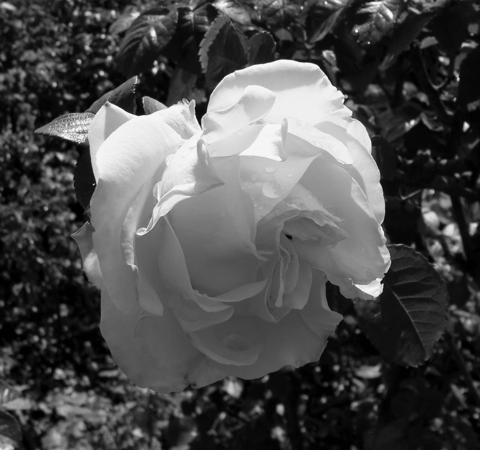

In [201]:
scale = 0.3
display(img.resize((int(img.width * scale), int(img.height * scale))))

In [203]:
def svd_transformation(A, n_comps):
    # SVD-разложение можно провести, воспользовавшись функцией модуля np.linalg.svd()
    U, D, V = np.linalg.svd(A)
    # По определению svd-преобразования, обрежем соответствующие матрицы
    U_cuted = U[:, :n_comps]
    D_cuted = np.diag(D[:n_comps])
    V_cuted = V[:n_comps, :]
    # Затем выполним их матричное умножение
    transformed = U_cuted.dot(D_cuted).dot(V_cuted)
    return transformed

In [205]:
img_array = np.asarray(img)
img_array.shape

(1503, 1600)

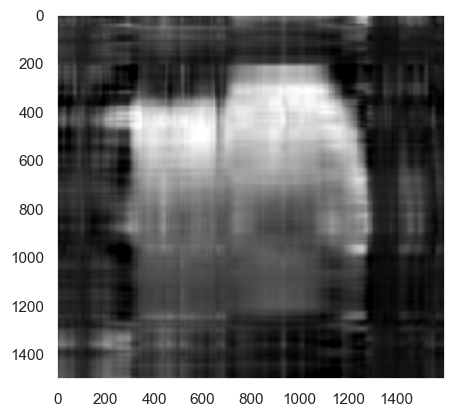

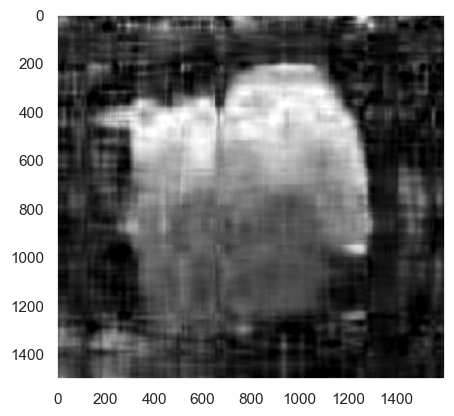

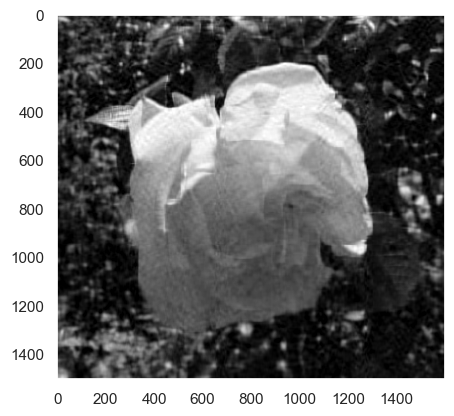

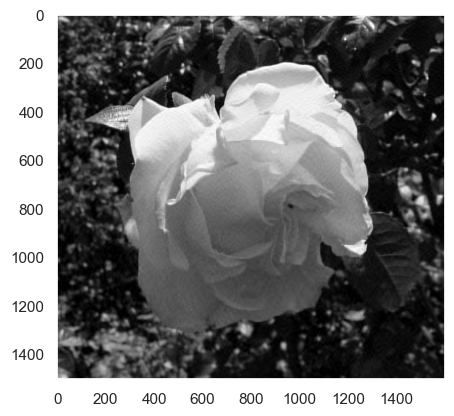

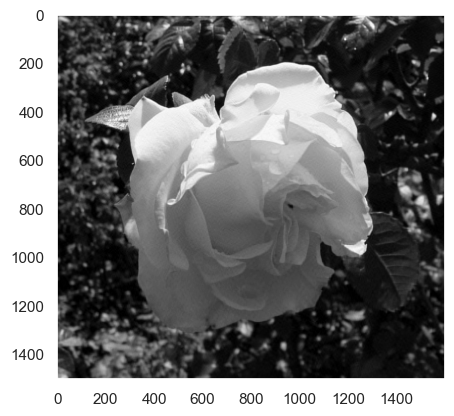

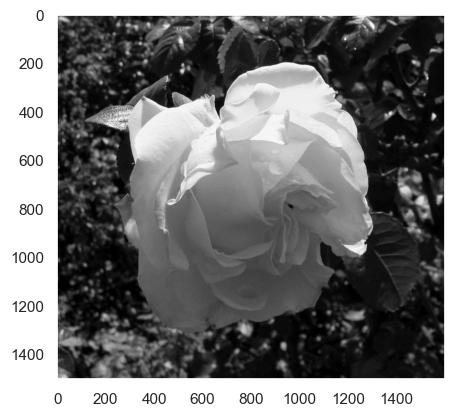

In [215]:
for n_comps in [5, 10, 50, 100, 150, 200]:
    # SVD-преобразование
    reconst_img = svd_transformation(img_array, n_comps)

    # Отрисовка результата
    print()
    fig = plt.figure(figsize=(5, 5))
    plt.grid(False)
    im = plt.imshow(reconst_img, cmap="gray", vmin=0, vmax=255)

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# статья 1 - о сноуборде
# статья 2 - о хоккее
# статья 3 - о фигурном катании
# статья 4 - о плавании

c_names = ["статья_1", "статья_2", "статья_3", "статья_4"]
words = ["снег", "гора", "лёд", "шайба", "опасность"]
post_words = pd.DataFrame(
    [[4, 4, 6, 2], [6, 1, 0, 5], [3, 0, 0, 5], [0, 6, 5, 1], [0, 4, 5, 0]],
    index=words,
    columns=c_names,
)
post_words.index.names = ["word"]
post_words

статья_1  статья_2  статья_3  статья_4
word                                             
снег              4         4         6         2
гора              6         1         0         5
лёд               3         0         0         5
шайба             0         6         5         1
опасность         0         4         5         0

In [217]:
n_approx = 2
A_approx = svd_transformation(post_words, n_approx)#np.matrix(U[:, :n_approx]) * np.diag(sigma[:n_approx]) * np.matrix(V[:n_approx, :])

pd.DataFrame(A_approx, index=words, columns=c_names)

статья_1  статья_2  статья_3  статья_4
снег       3.197084  4.818556  5.325736  2.792675
гора       5.619793  0.588201  0.384675  5.412204
лёд        4.043943  0.071665 -0.123639  3.917015
шайба      0.682117  5.089628  5.762122  0.336491
опасность  0.129398  4.219523  4.799185 -0.143946

In [218]:
(post_words - A_approx)/(post_words)

статья_1  статья_2  статья_3  статья_4
word                                             
снег       0.200729 -0.204639  0.112377 -0.396337
гора       0.063368  0.411799      -inf -0.082441
лёд       -0.347981      -inf       inf  0.216597
шайба          -inf  0.151729 -0.152424  0.663509
опасность      -inf -0.054881  0.040163       inf

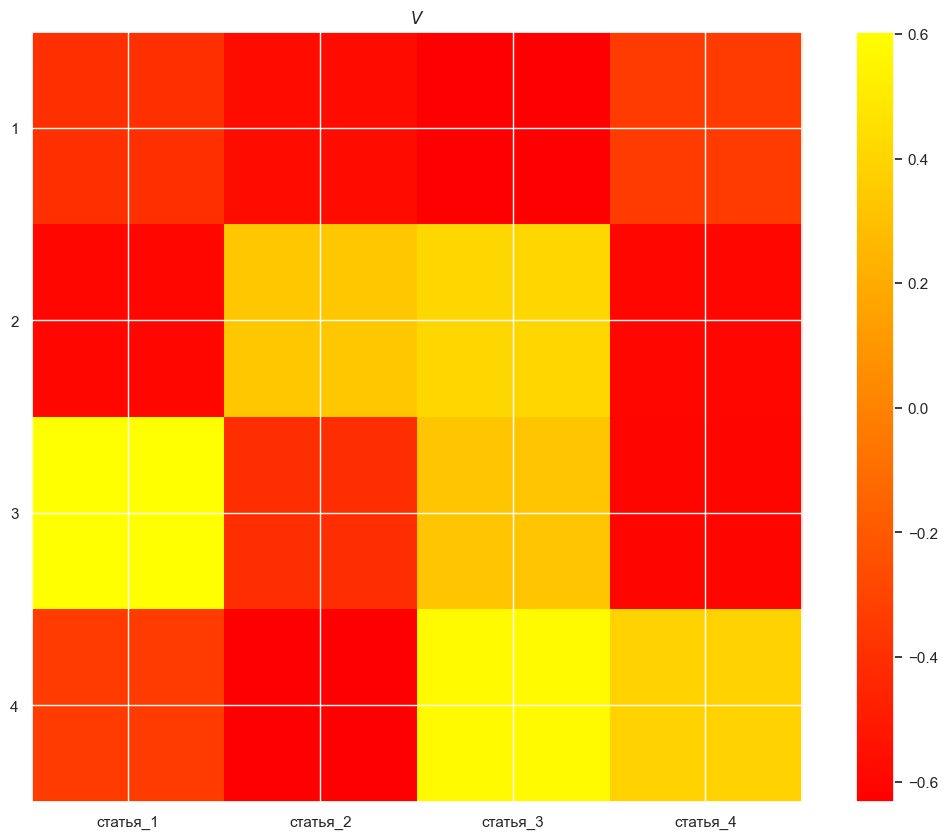

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt

U, D, V = np.linalg.svd(post_words)

plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -0.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.xaxis.label.set_color("black")
ax.yaxis.label.set_color("black")
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.imshow(V, cmap="autumn")
plt.colorbar();

In [221]:
from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn
import numpy as np

newsgroups = datasets.fetch_20newsgroups(
                    subset='all',
                    categories=['alt.atheism', 'sci.space']
             )

In [222]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(newsgroups.data)
y = newsgroups.target

In [223]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [227]:
from sklearn.decomposition import PCA
import xgboost as xgb
from sklearn.metrics import accuracy_score

n_comp = 10
pca = PCA(n_components=n_comp)
X_tr = pca.fit_transform(X_train.toarray())
x_te = pca.transform(x_test.toarray())

clf = xgb.XGBClassifier().fit(X_tr, y_train)

In [228]:
acc = accuracy_score(clf.predict(x_te), y_test)
acc

0.9757462686567164

In [229]:
clf_full = xgb.XGBClassifier().fit(X_train, y_train)
acc = accuracy_score(clf_full.predict(x_test), y_test)
acc

0.9720149253731343

In [230]:
texts = ['Mars has an atmosphere', "Saturn 's  moon Titan has its own atmosphere", "Mars has two moons", "Saturn has many moons", "Io has cryo-vulcanoes"]

In [253]:
import numpy as np
def make_cooccurrence_matrix(teexts):
  # Зададим словарь и попарную частоту совместной встречаемости слов
  vocabulary = set(texts[0].split())
  for t in texts[1:]:
    vocabulary = vocabulary.union(set(t.split()))
  vocabulary=list(vocabulary)
  N = len(vocabulary)

  # Задаём cooccurrence matrix
  cooccurrence = np.zeros((N,N))
  for i in range(N):
    for j in range(i, N):
      if i == j:
        continue
      for t in texts:
        if vocabulary[i] in t.split() and vocabulary[j] in t.split():
          cooccurrence[i][j]+=1
          cooccurrence[j][i]+=1
  return cooccurrence, vocabulary

In [254]:
c, v = make_cooccurrence_matrix(texts)

['Titan', 'has', 'an', 'own', 'atmosphere', 'two', 'Io', 'many', 'cryo-vulcanoes', 'Saturn', 'its', 'moon', 'Mars', "'s", 'moons']


In [255]:
v

['Titan',
 'has',
 'an',
 'own',
 'atmosphere',
 'two',
 'Io',
 'many',
 'cryo-vulcanoes',
 'Saturn',
 'its',
 'moon',
 'Mars',
 "'s",
 'moons']

In [256]:
c

array([[0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 0., 1., 1., 2., 1., 1., 1., 1., 2., 1., 1., 2., 1., 2.],
       [0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.],
       [1., 2., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 2., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 2., 0., 0., 0., 1., 0.

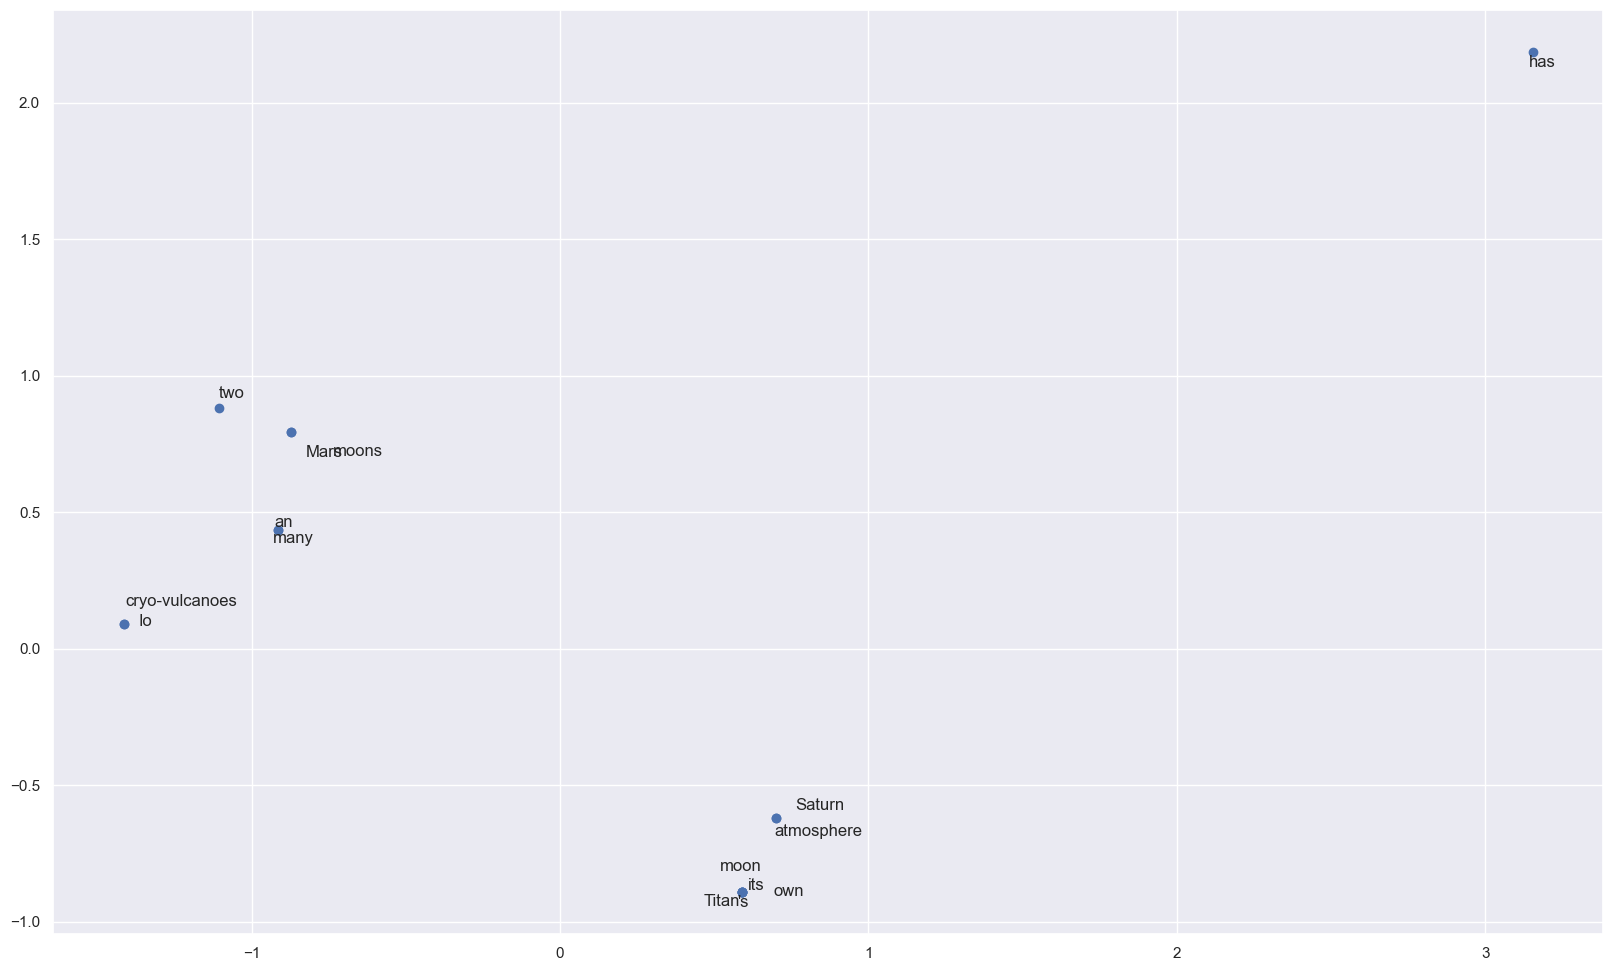

In [258]:
from sklearn.decomposition import PCA
p = PCA(n_components=2)
pca = p.fit_transform(c)

import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(20,12))
ax = plt.gca()
for i,c in enumerate(pca):
    ax.annotate(text = v[i], xy = (c[0] + np.random.randn()/15, c[1]+ np.random.randn()/15))
plt.scatter(pca[:,0], pca[:,1])

In [259]:
%matplotlib inline

from sklearn.datasets import load_digits
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

mnist = load_digits()
pd.DataFrame(mnist.data).head()

0    1    2     3     4     5    6    7    8    9   ...   54   55   56  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  5.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  9.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    57   58    59    60    61   62   63  
0  0.0  6.0  13.0  10.0   0.0  0.0  0.0  
1  0.0  0.0  11.0  16.0  10.0  0.0  0.0  
2  0.0  0.0   3.0  11.0  16.0  9.0  0.0  
3  0.0  7.0  13.0  13.0   9.0  0.0  0.0  
4  0.0  0.0   2.0  16.0   4.0  0.0  0.0  

[5 rows x 64 columns]

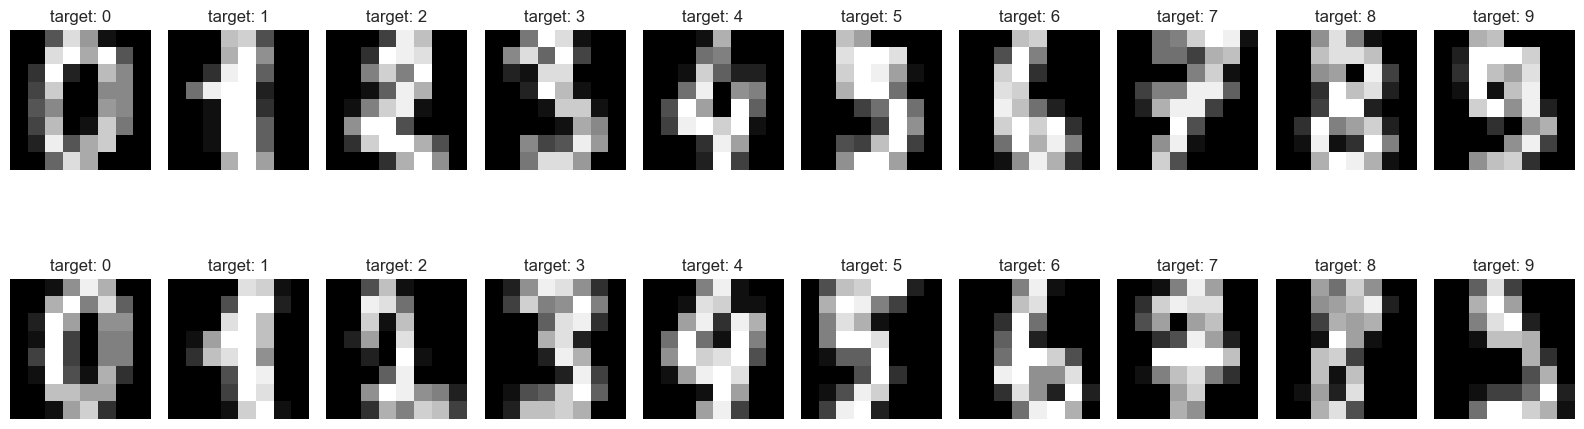

In [260]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")

plt.tight_layout()

In [261]:
X = mnist.data
X.shape


(1797, 64)

In [262]:
y = mnist.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [263]:
standardized_data = StandardScaler().fit_transform(X)
print(standardized_data.shape)

(1797, 64)


In [264]:
tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(X)

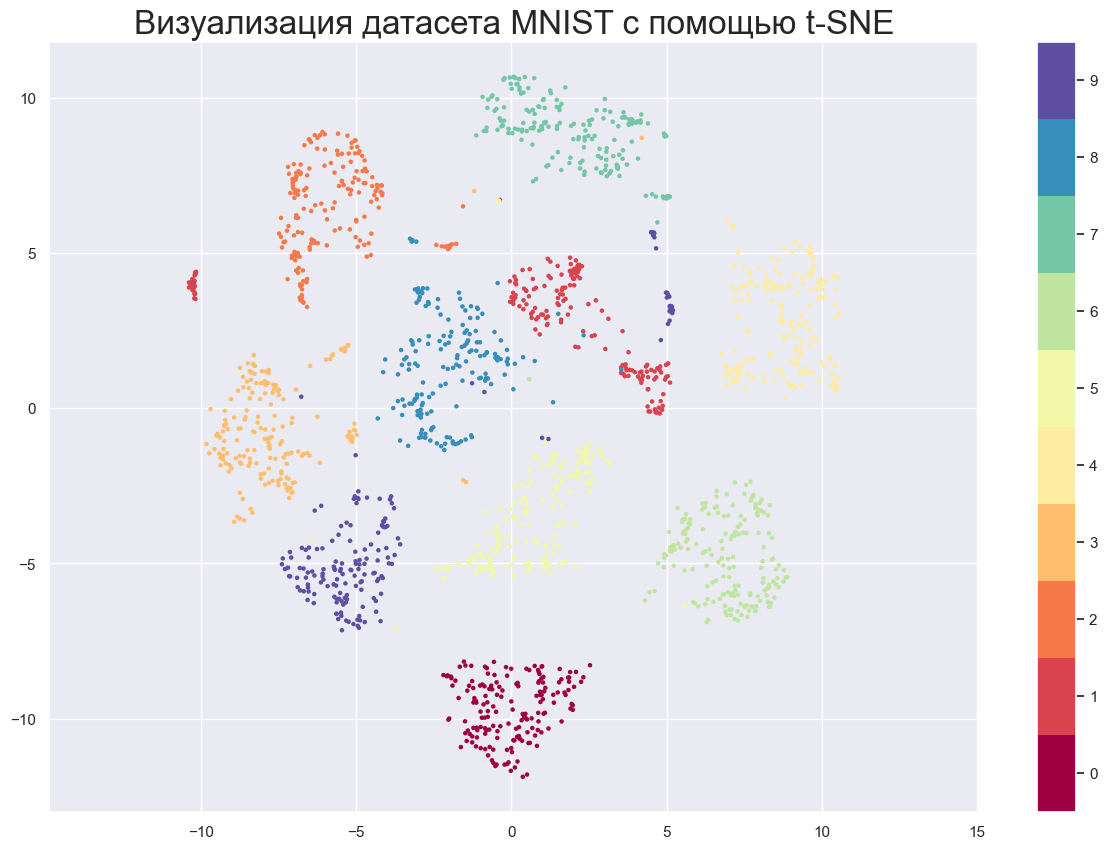

In [265]:
plt.figure(figsize=(15,10))

plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=y, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Визуализация датасета MNIST с помощью t-SNE', fontsize=24);

In [ ]:
Лекция 9

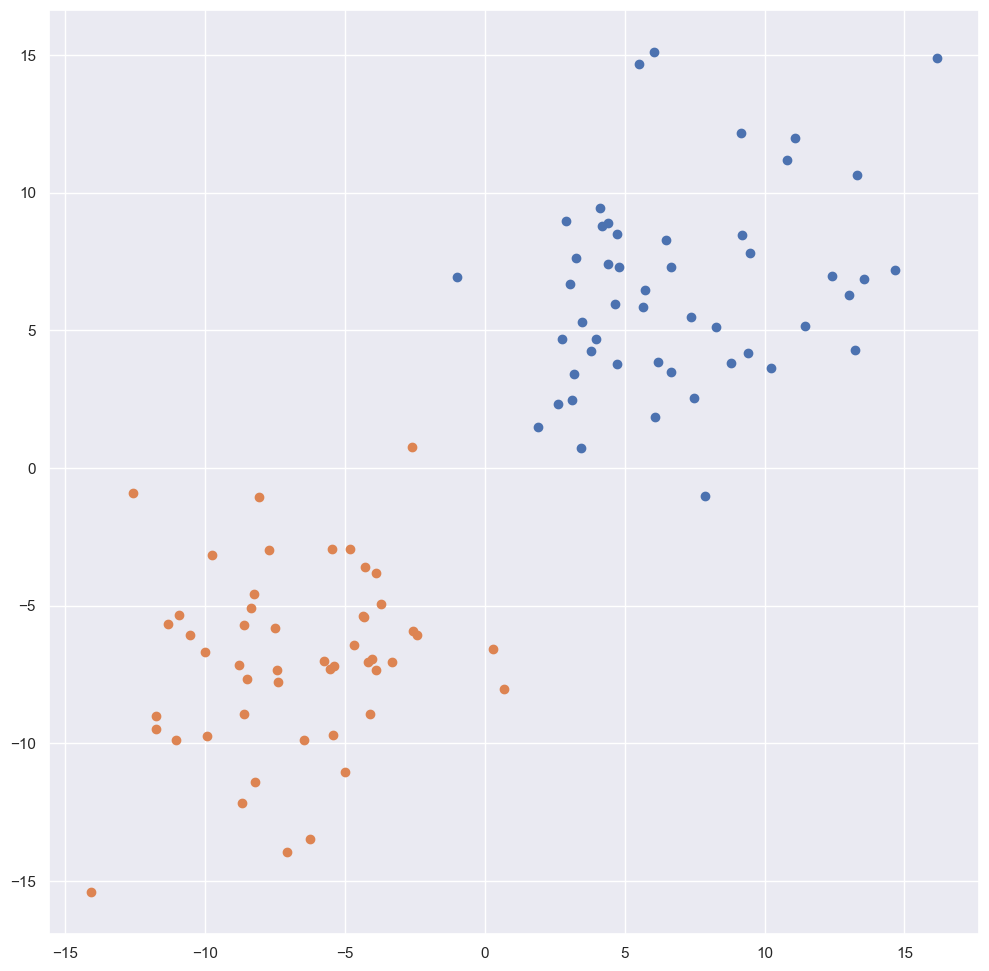

In [266]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()

a_x = 3.5 * np.random.randn(50) + 7
a_y = 3.5 * np.random.randn(50) + 7
b_x = 3.5 * np.random.randn(50) - 7
b_y = 3.5 * np.random.randn(50) - 7

plt.figure(figsize=(12, 12))
plt.scatter(a_x, a_y)
plt.scatter(b_x, b_y)

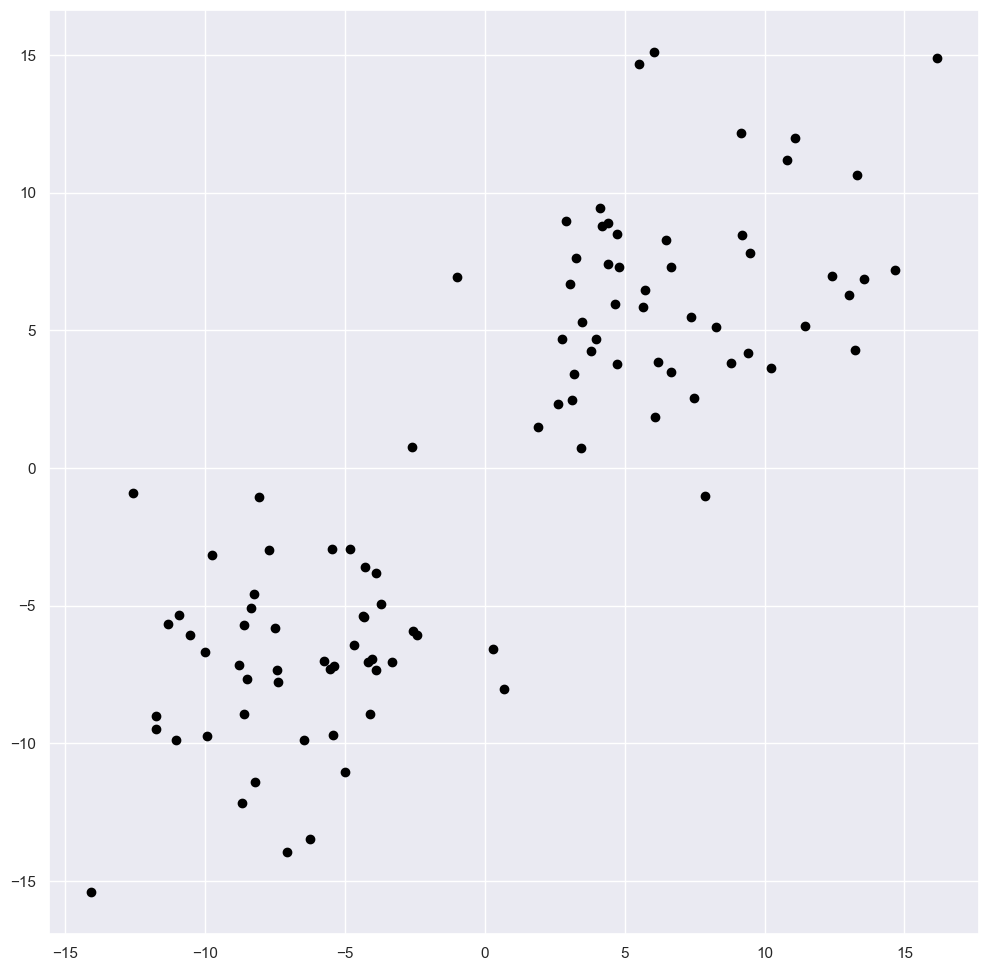

In [267]:
# Зададим функцию расстояния
dist = lambda x1, y1, x2, y2: np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Напишем класс "точка"
class point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def count_distance(self, p):
        return dist(self.x, self.y, p.x, p.y)

    def set_cluster(self, cluster):
        self.cluster = cluster

    def draw(self, color):
        plt.scatter([self.x], [self.y], c=color)

# Объединим все точки в единый список без заполнения информации о метке объектов
points = [point(a_x[i], a_y[i]) for i in range(len(a_x))] + [
    point(b_x[i], b_y[i]) for i in range(len(b_x))
]

plt.figure(figsize=(12, 12))
for i in range(len(points)):
    points[i].draw("black")

In [268]:
# Напишем функцию одного шага
def step(points, cluster_center_1, cluster_center_2):
    for i in range(len(points)):
        distance_1 = points[i].count_distance(cluster_center_1)
        distance_2 = points[i].count_distance(cluster_center_2)
        if distance_1 < distance_2:
            points[i].set_cluster(1)
        else:
            points[i].set_cluster(2)
    return points

# Функция пересчета центра кластера

def find_centers(points):
    cl1 = []
    cl2 = []

    for i in range(len(points)):
        if points[i].cluster == 1:
            cl1.append(points[i])
        else:
            cl2.append(points[i])

    cluster_center_1 = point(np.mean([p.x for p in cl1]),
                             np.mean([p.y for p in cl1]))

    cluster_center_2 = point(np.mean([p.x for p in cl2]),
                             np.mean([p.y for p in cl2]))

    return cluster_center_1, cluster_center_2

# Одна итерация цикла
# Функция update работает в одном из двух режимов: в нулевом режиме она пересчитывает новое распределение точек по кластерам,
# исходя из данных центров, а в первом - пересчитывает новые центры по заданным кластерам
# Эти режимы кодируются входной переменной rjm, принимающей одно из двух значений - 0 или 1. На выходе мы изменяем значение этой переменной на противоположное

def update(points, cluster_center_1, cluster_center_2, rjm):
    if rjm:
        c1 = cluster_center_1
        c2 = cluster_center_2
        cluster_center_1, cluster_center_2 = find_centers(points)
        plt.arrow(c1.x, c1.y, cluster_center_1.x - c1.x, cluster_center_1.y - c1.y, color='black')
        plt.arrow(c2.x, c2.y, cluster_center_2.x - c2.x, cluster_center_2.y - c2.y, color='black')
    else:
        points = step(points, cluster_center_1, cluster_center_2)
    for p in points:
        p.draw('r' if p.cluster == 1 else 'b')

    cluster_center_1.draw('m')
    cluster_center_2.draw('y')

    return points, cluster_center_1, cluster_center_2, 1-rjm

c1 = point(-15,10)
c2 = point(15,-10)
rjm = 0

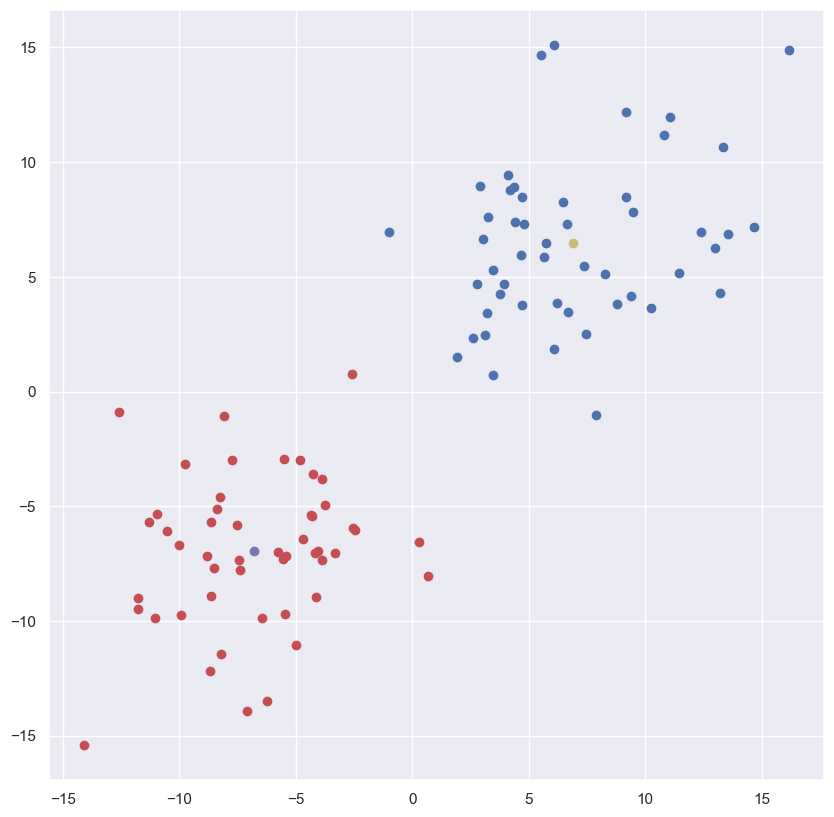

In [275]:
"""
Функция update делает и отрисовывает всего один шаг работы алгоритма!
Для наблюдения работы алгоритма требуется исполнить данную ячейку (и все ячейки с функцией update) несколько раз!
"""
plt.figure(figsize=(10,10))
points, c1, c2, rjm = update(points, c1, c2, rjm)

In [276]:
import collections
from collections import defaultdict
def step(points, centers):
    for i in range(len(points)):
      distances = [points[i].count_distance(centers[k]) for k in centers.keys()]
      cluster = np.argmin(distances) + 1
      points[i].set_cluster(cluster)
    return points

def find_centers(points):
    clusters = defaultdict(list)
    centers = {}
    for i in range(len(points)):
      clusters[points[i].cluster].append(points[i])
    for k in clusters.keys():
      centers[k] = point(np.mean([p.x for p in clusters[k]]),
                         np.mean([p.y for p in clusters[k]]))
    return centers

def update(points, centers, rjm, colors_clusters, colors_centers):
    if rjm:
        c = centers
        centers = find_centers(points)
        for k in centers.keys():
            plt.arrow(c[k].x, c[k].y, centers[k].x - c[k].x, centers[k].y - c[k].y, color='black')
    else:
        points = step(points, centers)
    for p in points:
        p.draw(colors_clusters[p.cluster - 1])

    for i,k in enumerate(centers.keys()):
      centers[k].draw(colors_centers[i])
    return points, centers, 1-rjm

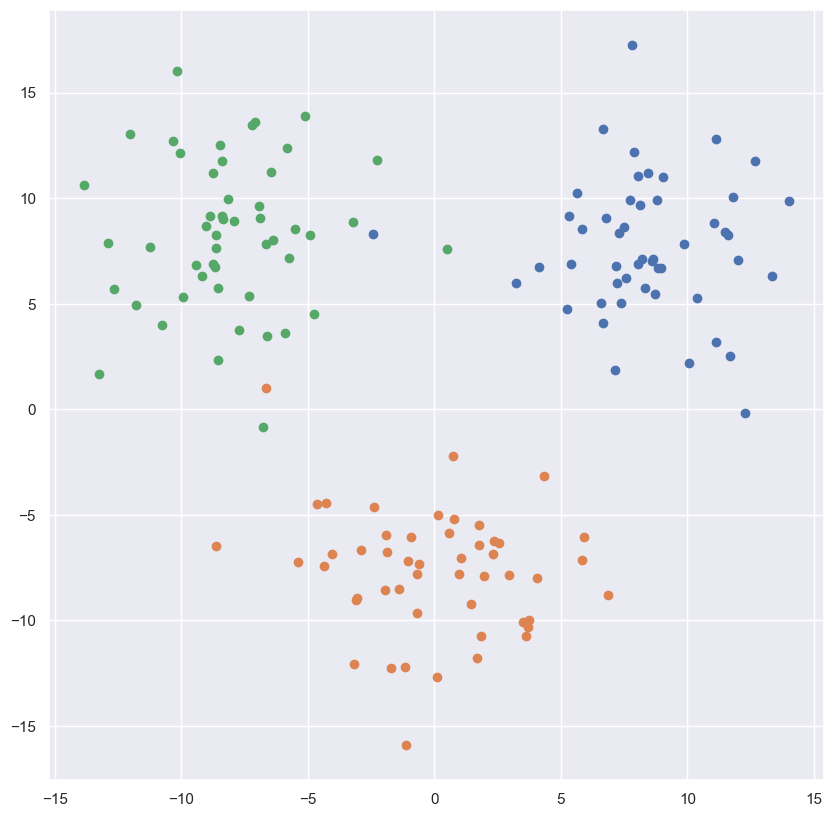

In [277]:
from matplotlib import pyplot  as plt
import numpy as np



a_x = 3.*np.random.randn(50) + 8
a_y = 3.*np.random.randn(50) + 8
b_x = 3.*np.random.randn(50)
b_y = 3.*np.random.randn(50) - 8
c_x = 3.*np.random.randn(50) - 8
c_y = 3.*np.random.randn(50) + 8

plt.figure(figsize=(10,10))
plt.scatter(a_x, a_y)
plt.scatter(b_x, b_y)
plt.scatter(c_x, c_y)

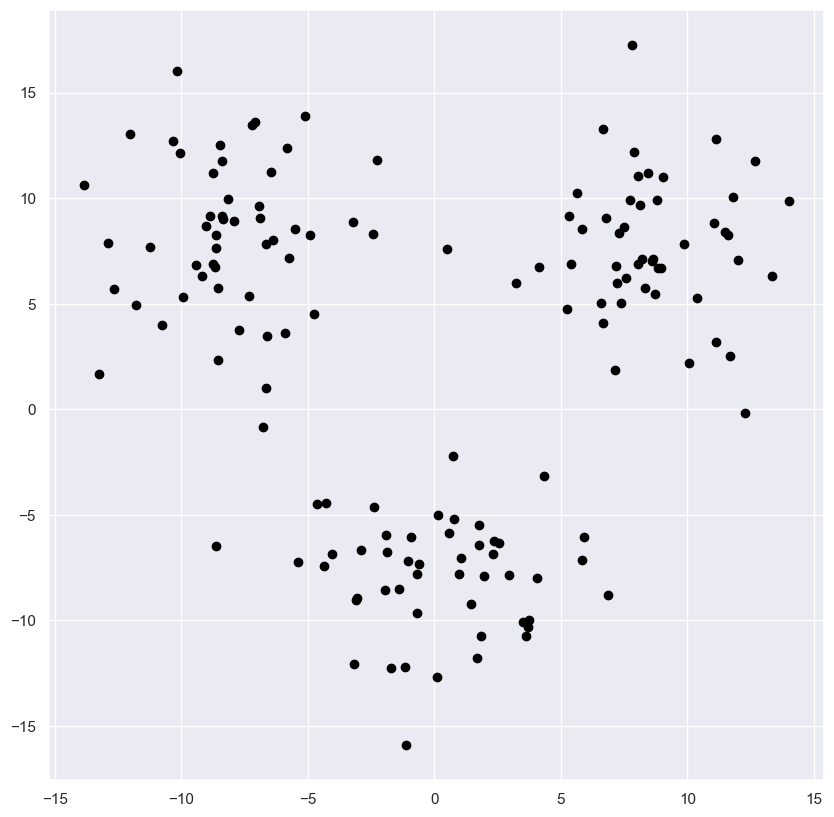

In [278]:
points = (
    [point(a_x[i], a_y[i]) for i in range(len(a_x))]
    + [point(b_x[i], b_y[i]) for i in range(len(b_x))]
    + [point(c_x[i], c_y[i]) for i in range(len(c_x))]
)

plt.figure(figsize=(10, 10))
for i in range(len(points)):
    points[i].draw("black")

In [279]:
centers = {1: point(-15,-15),2: point(15,-15),3: point(0,15)}
colors_clusters = ['g', 'b', 'r']
colors_centers = ['y', 'm', '#000000']
rjm = 0


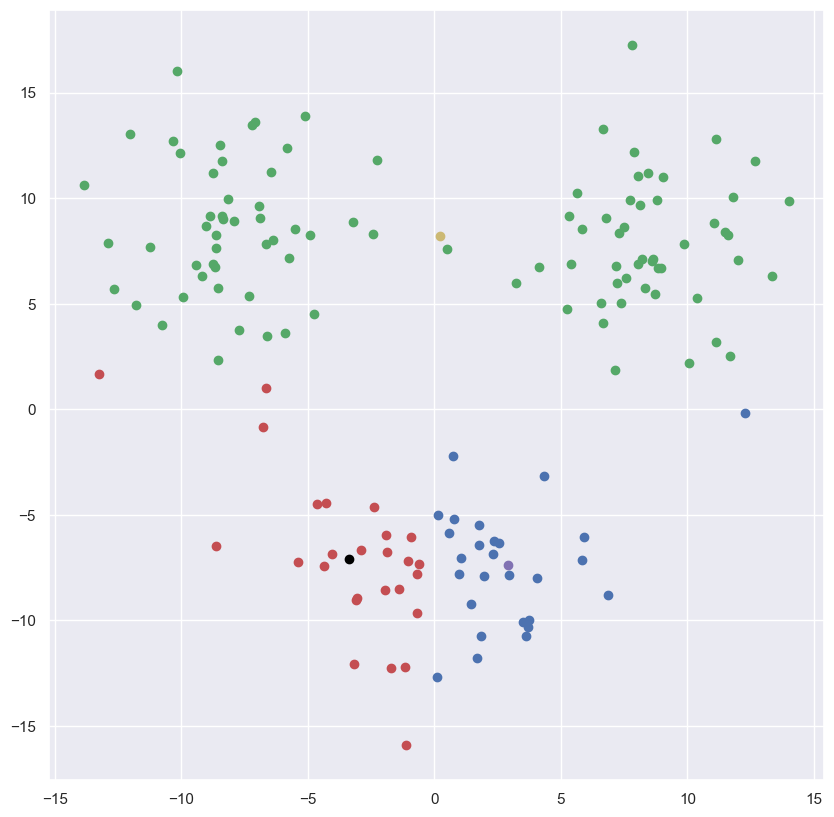

In [285]:
plt.figure(figsize=(10,10))
points, centers, rjm = update(points, centers, rjm, colors_clusters, colors_centers)

In [284]:
from sklearn.cluster import KMeans

In [287]:
X = [[p.x, p.y] for p in points]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

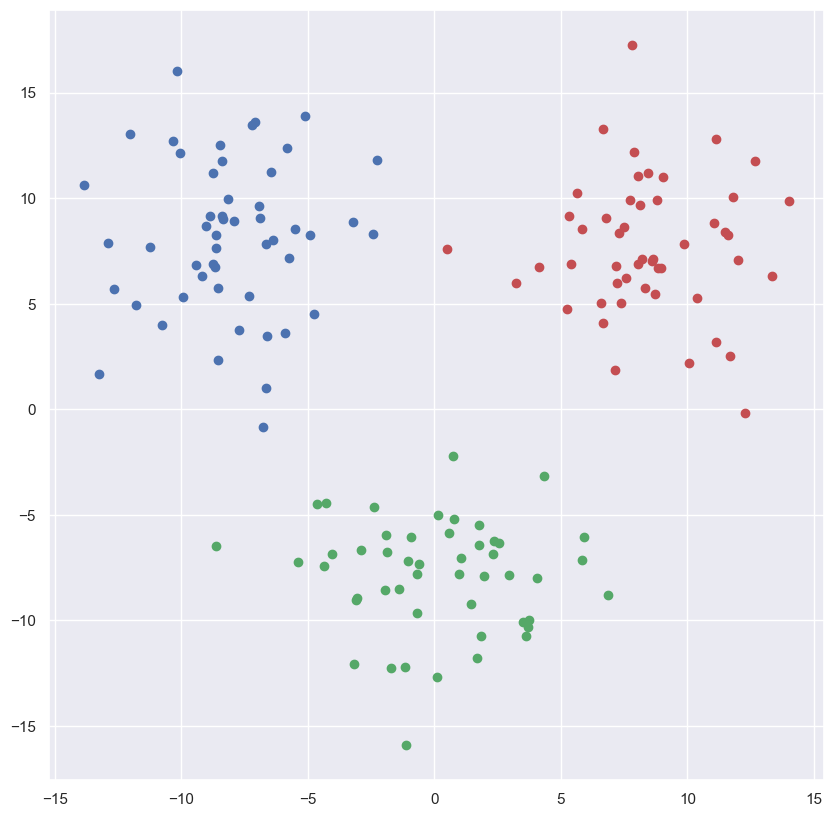

In [288]:
plt.figure(figsize=(10,10))
for i,p in enumerate(X):
  plt.scatter([p[0]], [p[1]], c=colors_clusters[kmeans.labels_[i]])

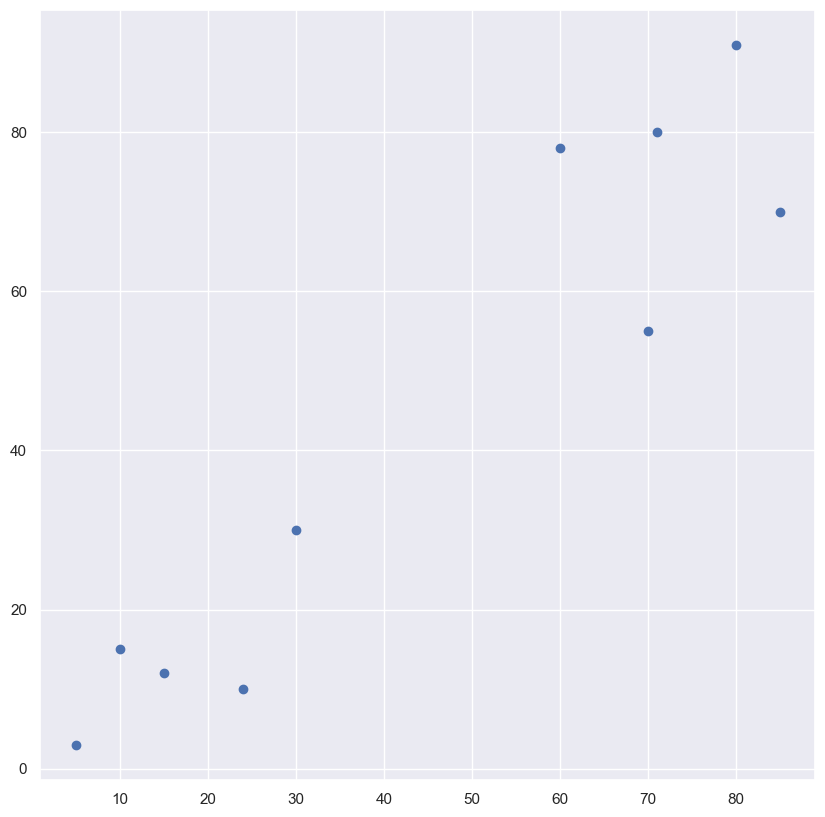

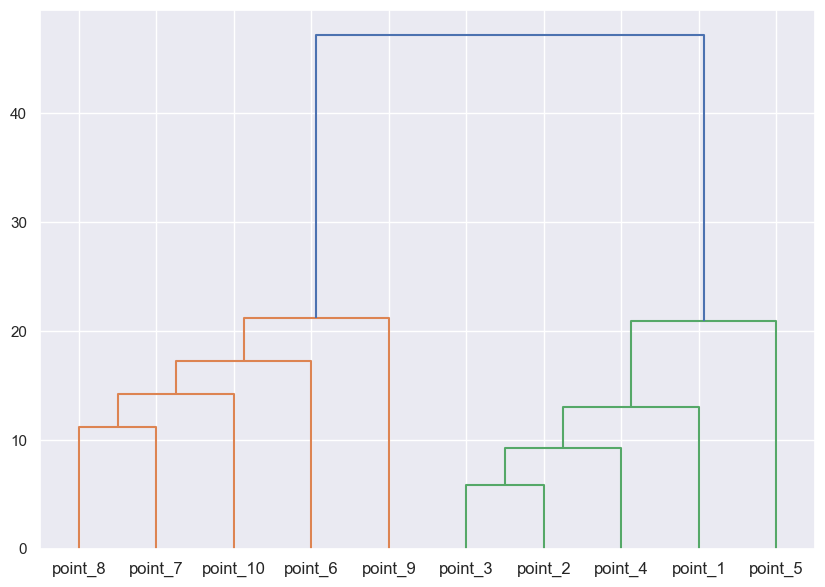

In [289]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))

X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

plt.scatter(X[:,0],X[:,1])

linked = linkage(X, 'single')
labelList = [f'point_{i}' for i in range(1, len(X)+1)]

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [291]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

In [292]:
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, names=['userId', 'itemId', 'rating', 'ts'])
ratings.sort_values(by=['userId', 'ts'], inplace=True)
ratings.head()

userId  itemId  rating         ts
31       1    3186       4  978300019
22       1    1270       5  978300055
27       1    1721       4  978300055
37       1    1022       5  978300055
24       1    2340       3  978300103

In [293]:
print('Число пользователей:', ratings['userId'].nunique())
print('Число фильмов:', ratings['itemId'].nunique())
print('Количество оценок:', len(ratings))

Число пользователей: 6040
Число фильмов: 3706
Количество оценок: 1000209


In [294]:
movies = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, names=['itemId', 'name', 'tags'], encoding="ISO-8859-1")
movies['tags'] = movies['tags'].str.split('|')
movies.head()

itemId                                name  \
0       1                    Toy Story (1995)   
1       2                      Jumanji (1995)   
2       3             Grumpier Old Men (1995)   
3       4            Waiting to Exhale (1995)   
4       5  Father of the Bride Part II (1995)   

                               tags  
0   [Animation, Children's, Comedy]  
1  [Adventure, Children's, Fantasy]  
2                 [Comedy, Romance]  
3                   [Comedy, Drama]  
4                          [Comedy]

In [295]:
mapping_movies_name = dict(zip(movies['itemId'], movies['name']))

In [297]:
ratings_pos = ratings[ratings['rating'] > 3]
counts = ratings_pos.groupby('itemId')['userId'].count().rename('cnt')
counts

itemId
1       1655
2        285
3        148
4         37
5         96
        ... 
3948     530
3949     240
3950      33
3951      27
3952     264
Name: cnt, Length: 3533, dtype: int64

In [298]:
user_likes = ratings_pos.groupby('userId')['itemId'].agg(list)
user_likes

userId
1       [3186, 1270, 1721, 1022, 1836, 3408, 2804, 120...
2       [1198, 1210, 1293, 2943, 1225, 1193, 318, 3030...
3       [2858, 1968, 1961, 1266, 1378, 1379, 3671, 590...
4       [1097, 3468, 480, 260, 1198, 1387, 2028, 2366,...
5       [908, 919, 1250, 2858, 2997, 2770, 2355, 2908,...
                              ...                        
6036    [1721, 1883, 2858, 2997, 2710, 223, 3203, 1093...
6037    [1267, 2028, 3148, 858, 562, 912, 1221, 923, 2...
6038    [1210, 2146, 356, 1079, 1148, 3548, 3088, 232,...
6039    [282, 111, 2067, 930, 3022, 3088, 2804, 955, 1...
6040    [858, 593, 2384, 1961, 2019, 573, 213, 3111, 3...
Name: itemId, Length: 6038, dtype: object

In [299]:
from itertools import combinations
from collections import Counter

counts_pair = Counter()

In [300]:
# считаем попарную встречаемость каждого фильма с каждым в рамках пользователя – n_{xy}
for items in tqdm(user_likes):
    for pair in combinations(items, 2):
        counts_pair[pair] += 1
        counts_pair[pair[::-1]] += 1

counts_pair = pd.DataFrame(
    [(*pair, cnt) for pair, cnt in counts_pair.items()],
    columns=['itemId_x', 'itemId_y', 'pair_cnt'],
)

# уберем те фильмы, которые встречали друг с другом менее 100 раз (считаем, что это шум)
counts_pair = counts_pair[counts_pair['pair_cnt'] > 100]
counts_pair.sort_values(by=['itemId_x', 'pair_cnt'], ascending=[True, False], inplace=True)

counts_pair.head()

  0%|          | 0/6038 [00:00<?, ?it/s]

itemId_x  itemId_y  pair_cnt
62532         1      1196      1000
777           1       260       998
22489         1      2858       949
19859         1      2571       925
40815         1      1198       922

In [301]:
counts_merged = pd.merge(counts_pair, counts, left_on='itemId_y', right_index=True)
counts_merged['score'] = counts_merged['pair_cnt'] / counts_merged['cnt']
counts_merged.sort_values(by=['itemId_x', 'score'], ascending=[True, False], inplace=True)
counts_merged.head()

itemId_x  itemId_y  pair_cnt  cnt     score
1942          1       783       129  162  0.796296
1944          1      1566       163  205  0.795122
1940          1      2294       252  330  0.763636
62596         1      1023       125  166  0.753012
1946          1      1907       242  323  0.749226

In [302]:
recos = counts_merged.groupby('itemId_x')['itemId_y'].agg(lambda x: list(x)[:30])
recos

itemId_x
1       [783, 1566, 2294, 1023, 1907, 1025, 3034, 2083...
2       [2161, 1917, 316, 367, 2006, 364, 1073, 2640, ...
6       [2231, 2278, 431, 163, 555, 1589, 1047, 288, 1...
7       [2671, 539, 597, 11, 587, 1393, 1784, 1307, 35...
10      [1722, 1479, 2989, 3082, 2993, 1918, 2991, 434...
                              ...                        
3916    [3510, 3948, 3555, 3897, 3753, 3408, 2268, 139...
3927    [924, 750, 1200, 541, 1580, 480, 1214, 1097, 1...
3948    [3893, 3916, 3911, 3897, 3317, 3510, 3624, 386...
3949    [3317, 3911, 3897, 3160, 1673, 3481, 2692, 120...
3952    [3911, 3897, 3408, 3481, 1704, 2599, 50, 1213,...
Name: itemId_y, Length: 1095, dtype: object

In [304]:
def top_recomendations(item_x):
  print('Рекомендации для ', mapping_movies_name[item_x], ':', sep='')
  print('=' * 60)

  for i, item_y in enumerate(recos.loc[item_x], 1):
      print('{:02d}\t{}'.format(i, mapping_movies_name[item_y]))

In [ ]:
def pop_half(lst, typ):
    list new_lst = []
    if typ = 0:
       for i in range (lst.len()/2):
           new_lst = lst[

In [ ]:
Лекция 12

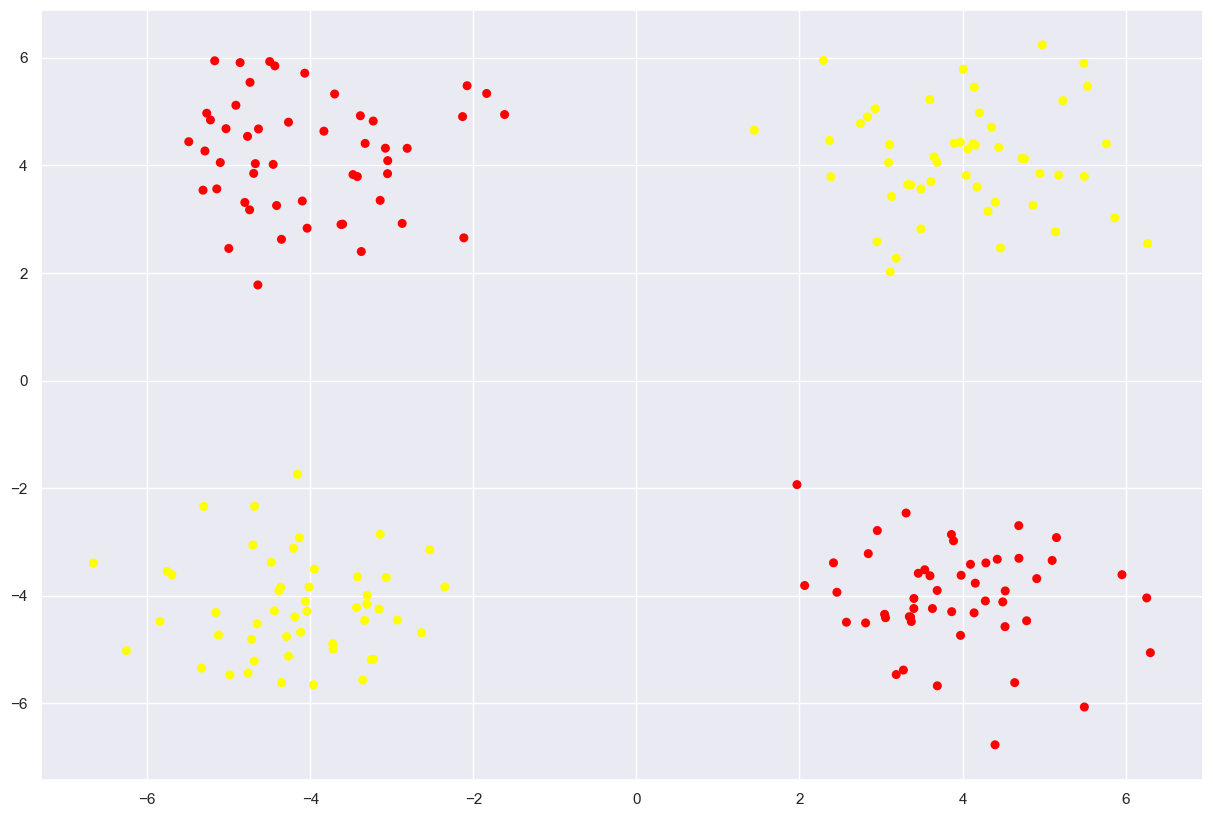

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

rng = np.random.RandomState(0)
X1 = rng.randn(50, 2) + np.array([4,4])
X2 = rng.randn(50, 2) + np.array([-4,4])
X3 = rng.randn(50, 2) + np.array([4,-4])
X4 = rng.randn(50, 2) + np.array([-4,-4])
X = np.concatenate([X1,X2,X3,X4])
classes = np.sign(X[:, 0]*X[:, 1])

plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], s=30, c=classes, cmap=plt.cm.autumn)

In [4]:
import warnings
warnings.filterwarnings('ignore')
def plot_gradient(clf, X, y, plot_title):
  clf.fit(X, y)

  x_mesh, y_mesh = np.meshgrid(np.linspace(-8, 8, 50), np.linspace(-8, 8, 50))
  to_forecast = np.vstack((x_mesh.ravel(), y_mesh.ravel()))
  Z = clf.predict_proba(to_forecast.T)[:, 1]
  Z = Z.reshape(x_mesh.shape)

  b_left= x_mesh.min()
  b_right = x_mesh.max()
  b_down = y_mesh.min()
  b_up = y_mesh.max()

  image = plt.imshow(Z,
                     aspect='auto',
                     origin='lower',
                     cmap=plt.cm.PuOr_r,
                     interpolation='quadric',
                     extent=(b_left, b_right, b_down, b_up))

  contours = plt.contour(x_mesh, y_mesh, Z, levels=[0], linewidths=2, linetypes='--')
  plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.autumn)
  plt.axis([-8, 8, -8, 8])
  plt.colorbar(image)
  plt.title(plot_title, fontsize=20);

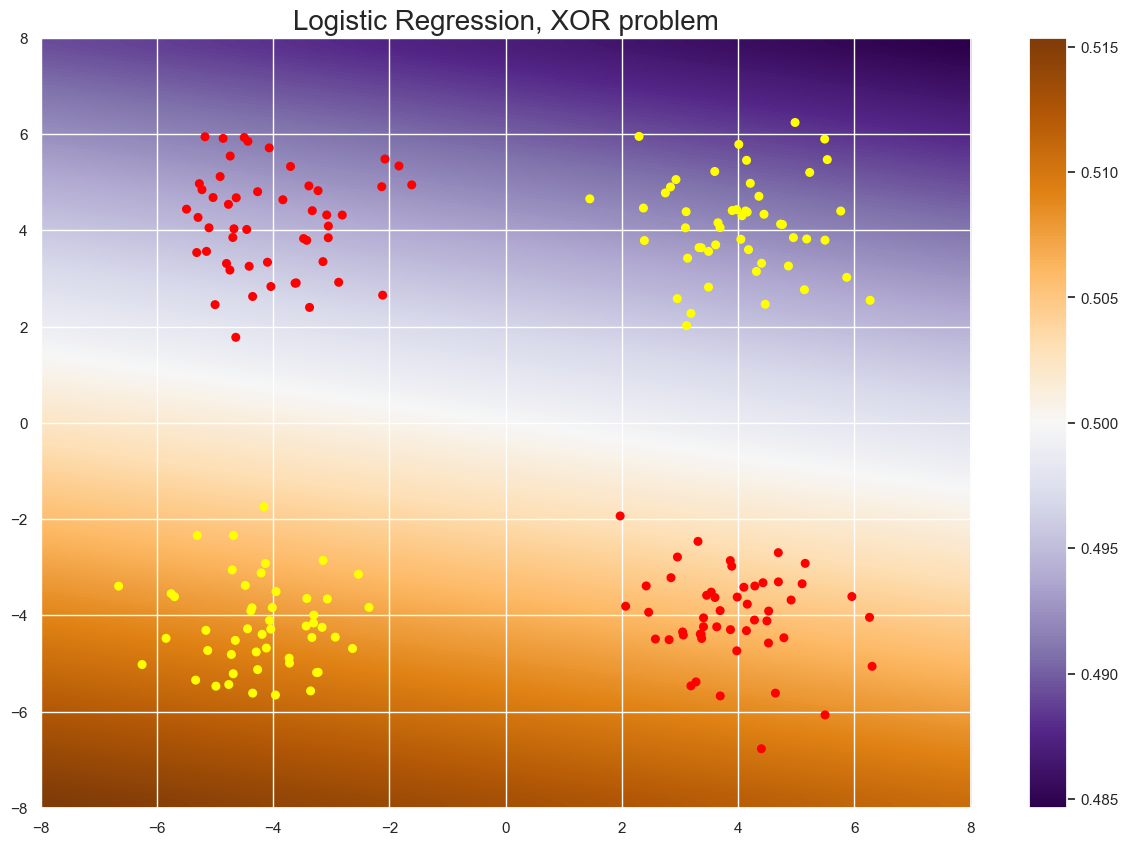

In [5]:
from sklearn.linear_model import LogisticRegression
plt.figure(figsize=(15,10))
plot_gradient(LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5), X, classes, "Logistic Regression, XOR problem")

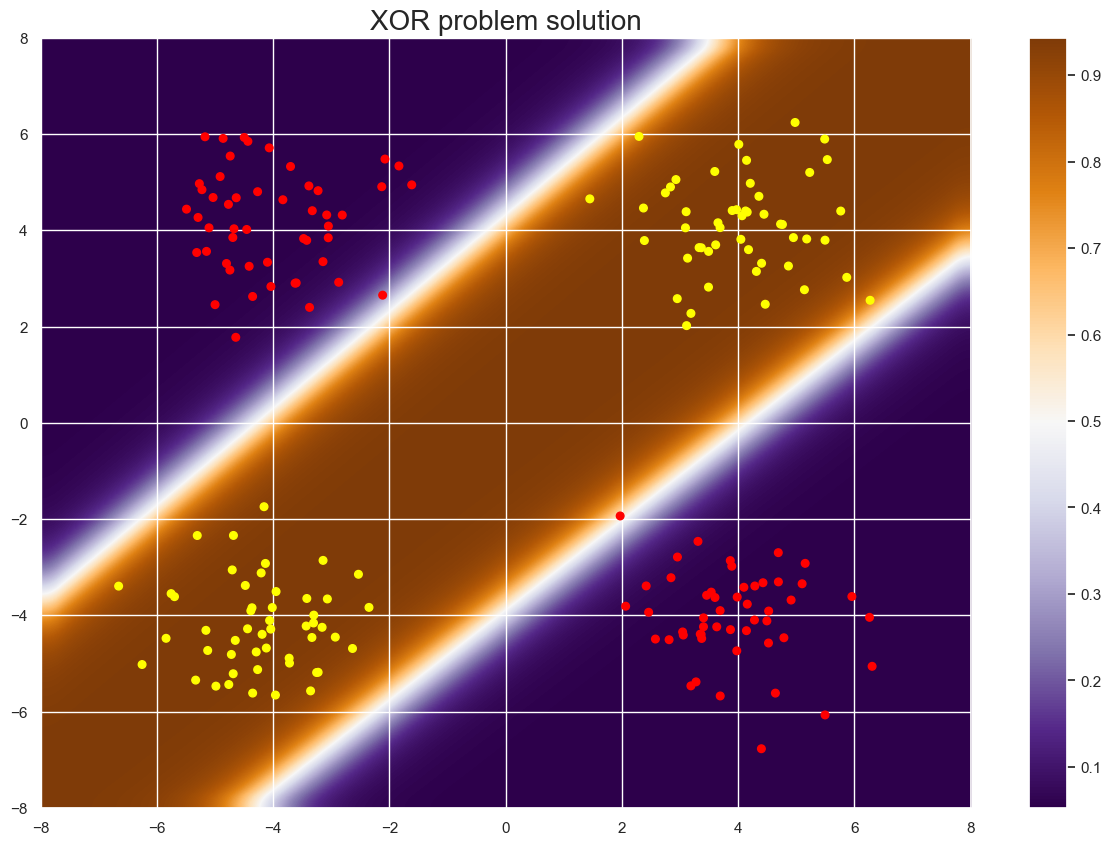

In [6]:
class trinity_of_lr:
  def __init__(self):
    self.lr_1 = LogisticRegression()
    self.lr_2 = LogisticRegression()
    self.lr_3 = LogisticRegression()

  def fit(self, X, y):
    y_1 = (X[:,0] > 0).astype(int) * (X[:,1] < 0).astype(int)
    y_2 = (X[:,0] < 0).astype(int) * (X[:,1] > 0).astype(int)

    self.lr_1.fit(X,y_1)
    self.lr_2.fit(X,y_2)

    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)

    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    self.lr_3.fit(x_3,y)

  def predict(self, X):
    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)
    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    preds = self.lr_3.predict(x_3)
    return preds


  def predict_proba(self, X):
    probas_1 = self.lr_1.predict_proba(X)
    probas_2 = self.lr_2.predict_proba(X)
    x_3 = np.concatenate([probas_1, probas_2], axis=-1)

    preds = self.lr_3.predict_proba(x_3)
    return preds

plt.figure(figsize=(15,10))
plot_gradient(trinity_of_lr(), X, classes, "XOR problem solution")


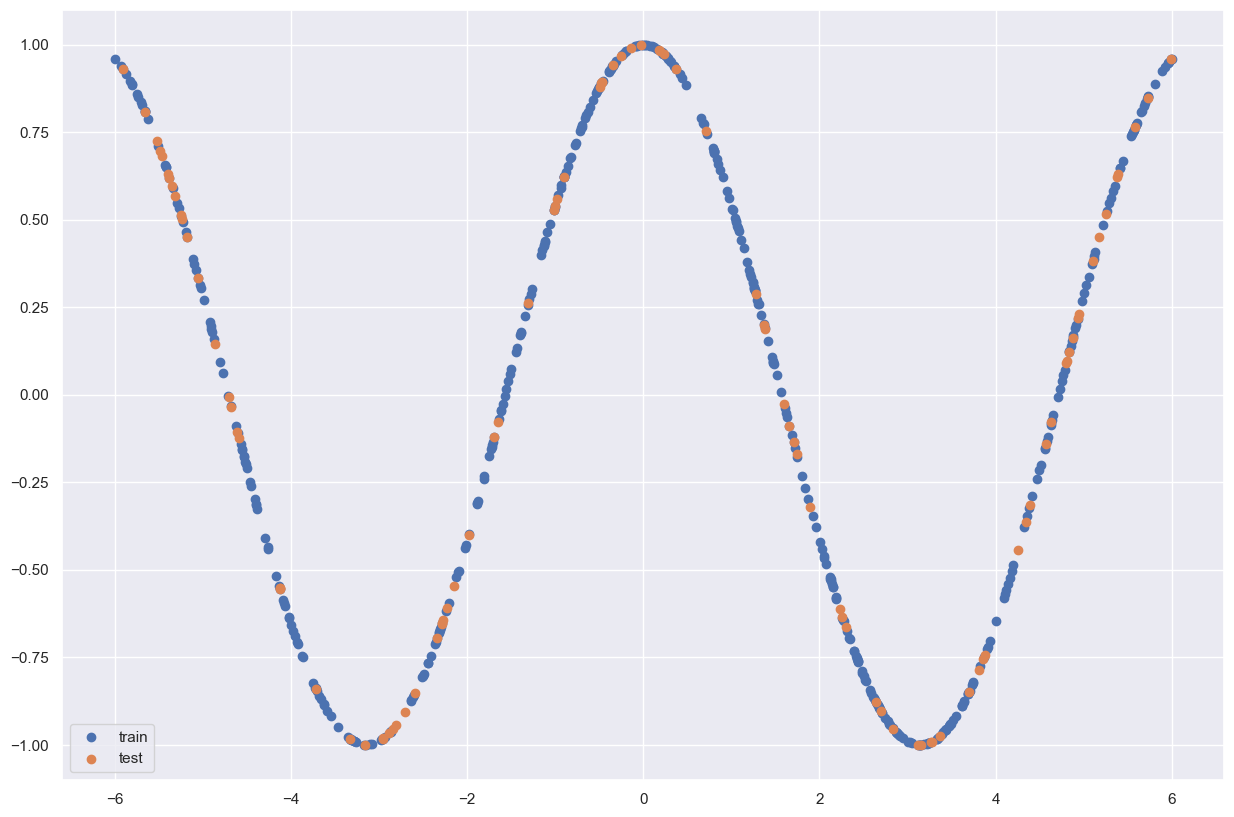

In [7]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt


X_train = np.random.uniform(-6,6, size=(500,1))
y_train = np.cos(X_train)

X_test = np.random.uniform(-6,6, size=(100,1))
y_test = np.cos(X_test)

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.legend()

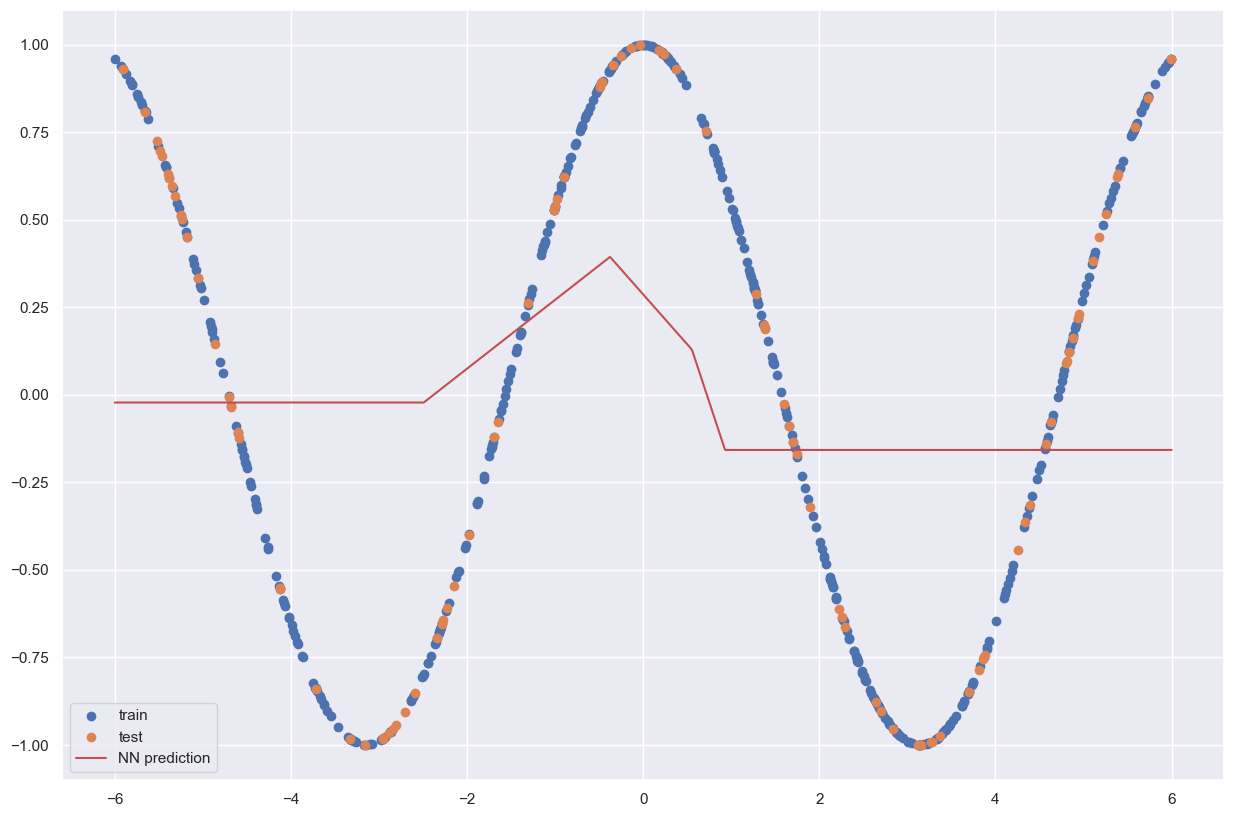

In [8]:
NN = MLPRegressor(hidden_layer_sizes=[3,2], activation='relu').fit(X_train,y_train)

grid = np.linspace(-6,6,1000)
preds = NN.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds, label='NN prediction', c='r')
plt.legend()

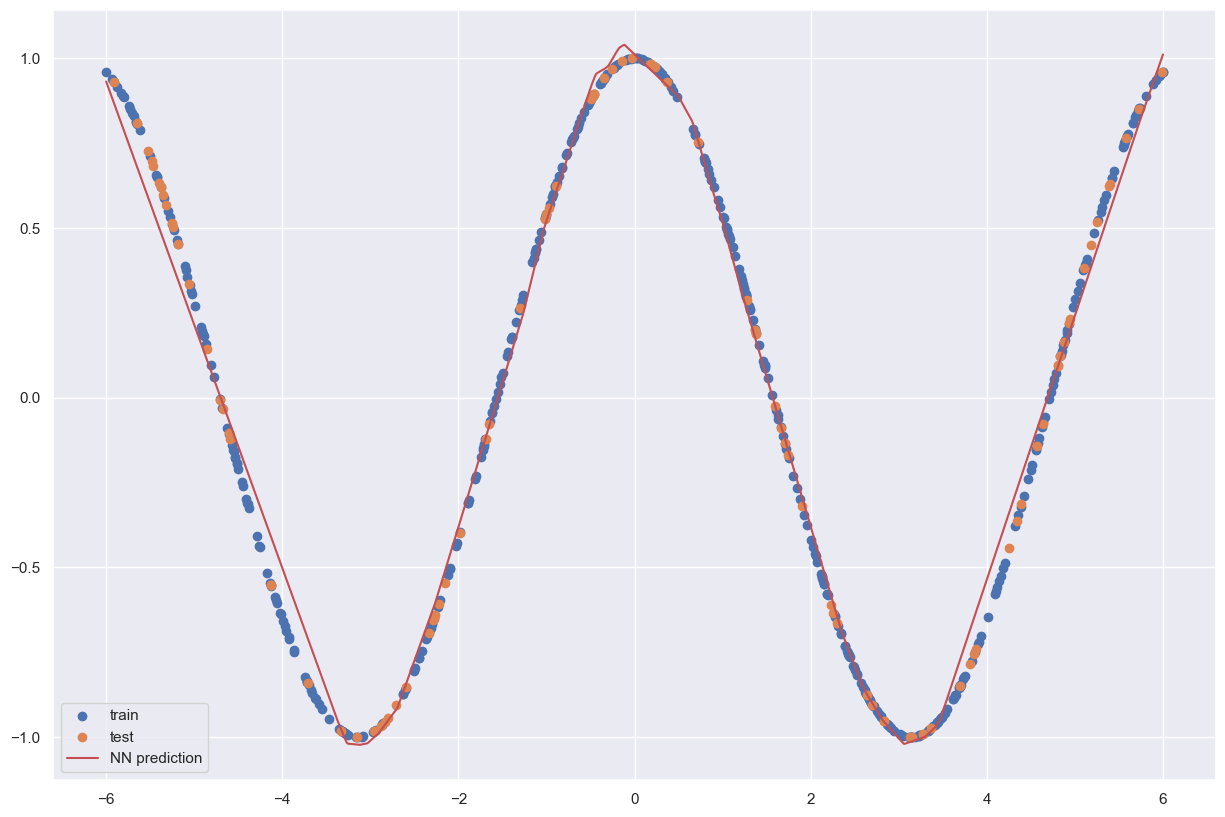

In [9]:
NN = MLPRegressor(hidden_layer_sizes=[30,20], activation='relu').fit(X_train,y_train)

preds = NN.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds, label='NN prediction', c='r')
plt.legend()

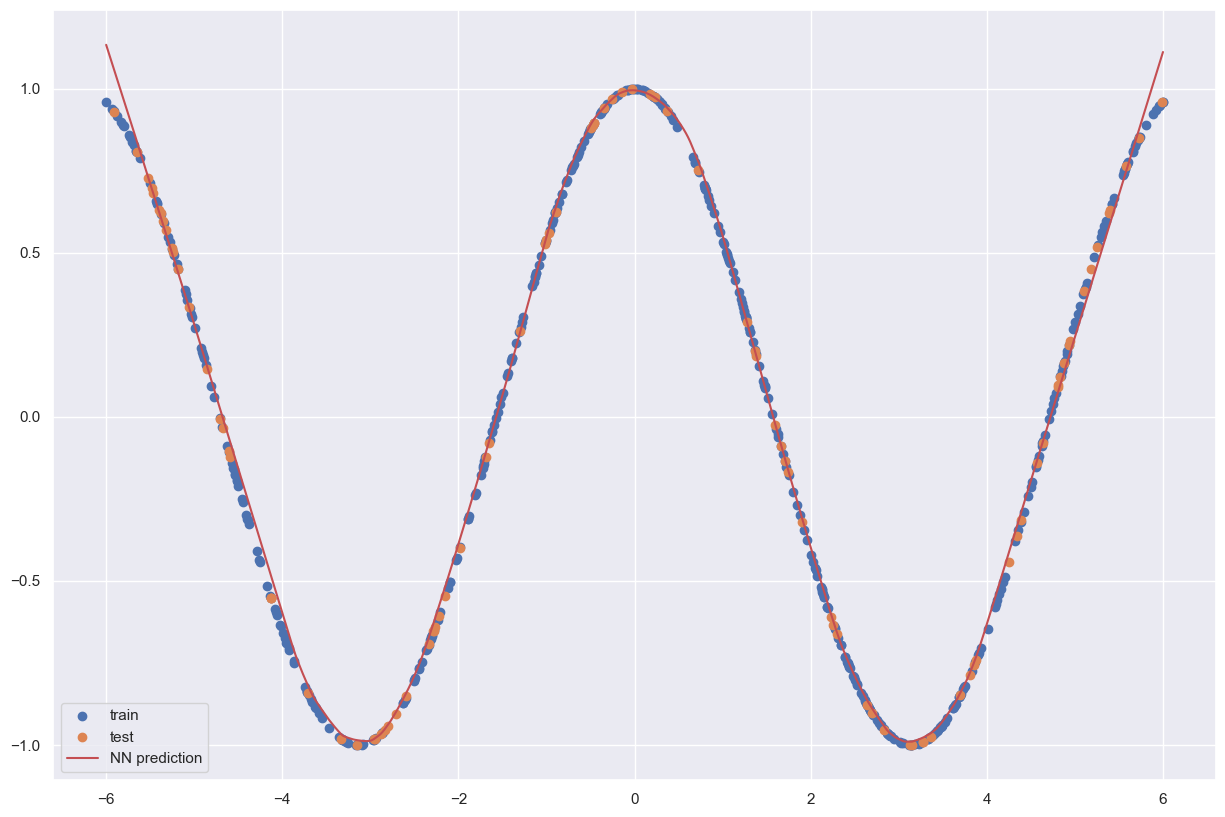

In [10]:
NN = MLPRegressor(hidden_layer_sizes=[1000, 200], activation='relu').fit(X_train,y_train)

preds = NN.predict(grid.reshape(-1,1))

plt.figure(figsize=(15,10))
plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test')
plt.plot(grid, preds, label='NN prediction', c='r')
plt.legend()

In [11]:
import numpy as np
# Получение выхода нейронной сети по её входу обычно называется прямым проходом.
# Реализуем его в функции форвард
def forward(W1, W2, X, f1, f2):
  z1 = np.matmul(W1, X)
  a1 = f1(z1)
  z2 = np.matmul(W2, a1)
  a2 = f2(z2)
  return a2
    

In [12]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)


Sc = StandardScaler()
x_train = Sc.fit_transform(x_train)
x_test = Sc.transform(x_test)

# Добавим в качестве последнего стобца к X столбец единиц. Это нужно для добавления свободного слагаемого
x_train = np.c_[x_train, np.ones(x_train.shape[0])]
x_test = np.c_[x_test, np.ones(x_test.shape[0])]

In [13]:
N_1 = 3
N_2 = 1

W1 = np.random.randn(N_1, x_train.shape[1])
W2 = np.random.randn(N_2, N_1)

def sigmoid(x):
  return 1/(1 + np.exp(-x))

f1 = sigmoid
f2 = sigmoid

forward(W1, W2, x_train[0].T, f1, f2)

array([0.35598156])